---
# Demonstrate functional differences between GSC states
---

/cluster/projects/pughlab/projects/BTSCs_scRNAseq/Manuscript_G607removed/NatCan_Rebuttal/FunctionalAssay_Validation

In [1]:
options(repos='http://cran.rstudio.com/')
library(ggplot2)
library(ggpubr)
library(gridExtra)
library(pheatmap)
library(survminer) ##v0.4.8
library(survival) ##v3.2-3 

In [3]:
### set working dir and read in data
setwd("~/Desktop/H4H/pughlab/projects/BTSCs_scRNAseq/Manuscript_G607removed/NatCan_Rebuttal/FunctionalAssay_Validation")
dat <- read.csv("SU2C_scRNA_FunctionalAssays_Aug2020.csv")
colnames(dat)[8] <- "SPHERE_FORMATION_CAPACITY"

----
## 1.0 Survival Analysis
---
https://www.datacamp.com/community/tutorials/survival-analysis-R  
http://www.sthda.com/english/wiki/survminer-r-package-survival-data-analysis-and-visualization  
https://rstudio.com/wp-content/uploads/2015/01/survminer-1.png

---
### 1.1 All samples, bulk RNAseq classification
---

Survival analysis of all lines with xenograft information and bin with bulk RNAsequencing classification
Take median xeno infromation for mice 

In [4]:
##subset data to only those with bulkRNA classification and xenograft
sub <- dat[!is.na(dat$BULK_RNASEQ_CLASSIFICATION), ]
remove <- c("N.A.", "N.D.", "NoTumours", "Underway")
sub <- sub[!sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS %in% remove, ]
sub$STATUS <- 1
sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS <- as.numeric(as.character(sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS))
table(sub$BULK_RNASEQ_CLASSIFICATION)


 Developmental InjuryResponse 
            23             14 

In [5]:
surv_object <- Surv(time = sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS, 
                    event = sub$STATUS
                   )

In [6]:
fit1 <- survfit(surv_object ~ BULK_RNASEQ_CLASSIFICATION, 
                data = sub
               )
#summary(fit1)


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


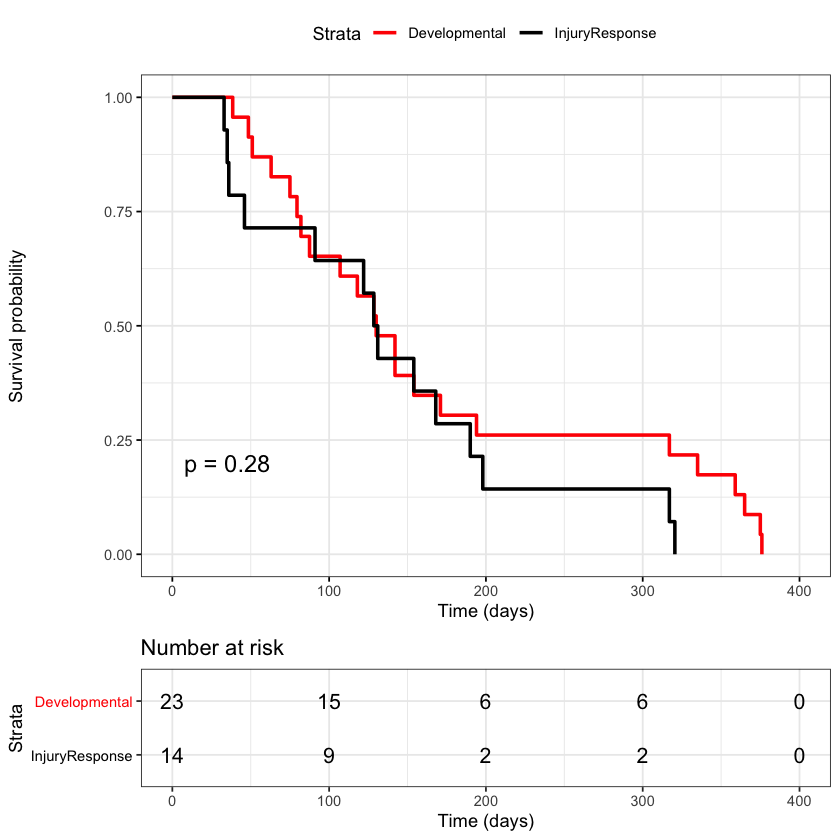

In [7]:
pdf("Dev_IR_AllSamples_KM.pdf", width = 4, height = 6)
ggsurvplot(fit1, 
           data = sub, 
           pval = TRUE,
           legend.labs = c("Developmental", "InjuryResponse"),
           palette = c("red", "black"),
           risk.table = T,
           xlab = "Time (days)",
           ggtheme = theme_bw()
          )

---
### 1.2 Remove IDH mutants, bulk RNAseq classification
---

Survival analysis of all lines with xenograft information and bin with bulk RNAsequencing classification
Take median xeno infromation for mice 


In [61]:
sub <- sub[!sub$IDH_1_2_STATUS == "IDH1_p.R100Q", ]
dim(sub)

[1] 36 17

In [62]:
surv_object <- Surv(time = sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS, 
                    event = sub$STATUS
                   )
fit1 <- survfit(surv_object ~ BULK_RNASEQ_CLASSIFICATION, 
                data = sub
               )

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


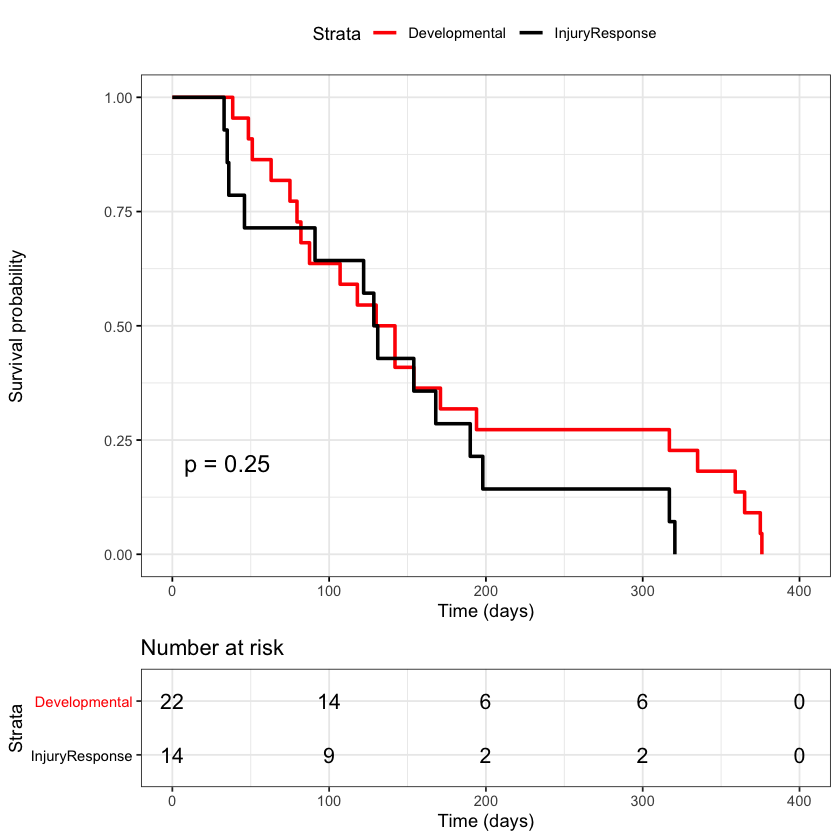

In [63]:
ggsurvplot(fit1, 
           data = sub, 
           pval = TRUE,
           legend.labs = c("Developmental", "InjuryResponse"),
           palette = c("red", "black"),
           risk.table = T,
           xlab = "Time (days)",
           ggtheme = theme_bw()
          )

---
### 1.3 Just the samples with scRNAseq
---

In [67]:
##subset data to only those with bulkRNA classification and xenograft
sub <- dat[dat$SINGLE_CELL_RNASEQ == "YES", ]
remove <- c("N.A.", "N.D.", "NoTumours", "Underway")
sub <- sub[!sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS %in% remove, ]
sub$STATUS <- 1
sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS <- as.numeric(as.character(sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS))

In [68]:
surv_object <- Surv(time = sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS, 
                    event = sub$STATUS
                   )
fit1 <- survfit(surv_object ~ BULK_RNASEQ_CLASSIFICATION, 
                data = sub
               )

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


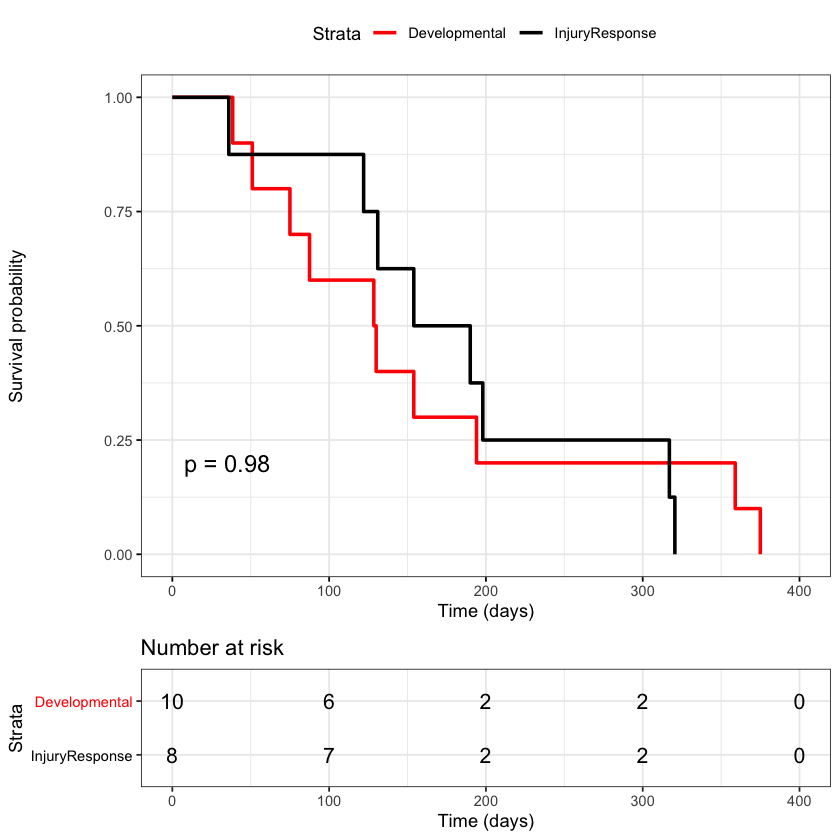

In [69]:
ggsurvplot(fit1, 
           data = sub, 
           pval = TRUE,
           legend.labs = c("Developmental", "InjuryResponse"),
           palette = c("red", "black"),
           risk.table = T,
           xlab = "Time (days)",
           ggtheme = theme_bw()
          )

---
### 1.4 Dirks Samples Only
---

In [110]:
lab <- "Dirks"

remove <- c("N.A.", "N.D.", "NoTumours", "Underway")
sub <- dat[!dat$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS %in% remove, ]
sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS <- as.numeric(as.character(sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS))
sub <- sub[!is.na(sub$BULK_RNASEQ_CLASSIFICATION), ]
sub <- sub[sub$LAB == lab, ]
sub$STATUS <- 1
dim(sub)

surv_object <- Surv(time = sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS, 
                    event = sub$STATUS
                   )
fit1 <- survfit(surv_object ~ BULK_RNASEQ_CLASSIFICATION, 
                data = sub
               )

ggsurvplot(fit1, 
           data = sub, 
           pval = TRUE,
           legend.labs = c("Developmental", "InjuryResponse"),
           palette = c("red", "black"),
           risk.table = T,
           xlab = "Time (days)",
           ggtheme = theme_bw()
          )

[1] 18 17

---
### 1.5 Weiss Samples Only
---

[1] 19 17

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


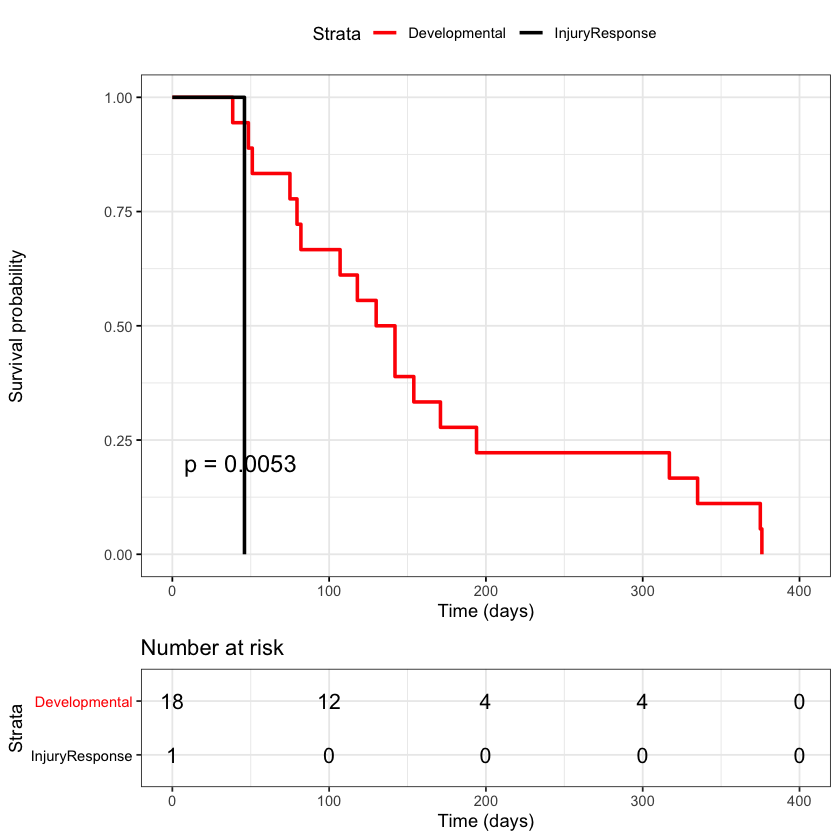

In [113]:
lab <- "Weiss"

remove <- c("N.A.", "N.D.", "NoTumours", "Underway")
sub <- dat[!dat$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS %in% remove, ]
sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS <- as.numeric(as.character(sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS))
sub <- sub[!is.na(sub$BULK_RNASEQ_CLASSIFICATION), ]
sub <- sub[sub$LAB == lab, ]
sub$STATUS <- 1
dim(sub)

surv_object <- Surv(time = sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS, 
                    event = sub$STATUS
                   )
fit1 <- survfit(surv_object ~ BULK_RNASEQ_CLASSIFICATION, 
                data = sub
               )

ggsurvplot(fit1, 
           data = sub, 
           pval = TRUE,
           legend.labs = c("Developmental", "InjuryResponse"),
           palette = c("red", "black"),
           risk.table = T,
           xlab = "Time (days)",
           ggtheme = theme_bw()
          )

---
### 1.6 Dirks vs. Weiss
---

[1] 37 17

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


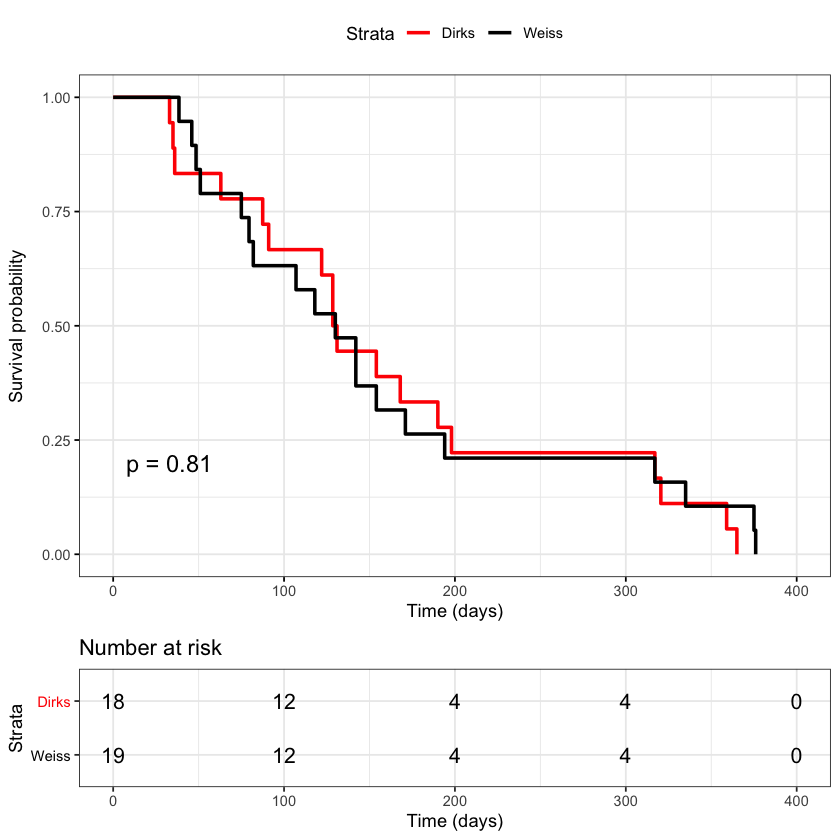

In [115]:
remove <- c("N.A.", "N.D.", "NoTumours", "Underway")
sub <- dat[!dat$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS %in% remove, ]
sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS <- as.numeric(as.character(sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS))
sub <- sub[!is.na(sub$BULK_RNASEQ_CLASSIFICATION), ]
sub$STATUS <- 1
dim(sub)

surv_object <- Surv(time = sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS, 
                    event = sub$STATUS
                   )
fit1 <- survfit(surv_object ~ LAB, 
                data = sub
               )

ggsurvplot(fit1, 
           data = sub, 
           pval = TRUE,
           legend.labs = c("Dirks", "Weiss"),
           palette = c("red", "black"),
           risk.table = T,
           xlab = "Time (days)",
           ggtheme = theme_bw()
          )

---
### 1.7 Break samples into quartiles based on bulk RNA gradient
---

In [217]:
sub <- dat[!is.na(dat$BULK_RNASEQ_CLASSIFICATION), ]
remove <- c("N.A.", "N.D.", "NoTumours", "Underway")
sub <- dat[!dat$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS %in% remove, ]
sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS <- as.numeric(as.character(sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS))

### calculate position on gradient 
### substract Dev - IR scores
sub$Dev_IR_DIFF <- sub$DEVELOPMENTAL_GSVA - sub$INJURYRESPONSE_GSVA

##order sub by Diff
sub <- sub[order(sub$Dev_IR_DIFF), ]
sub$Rank <- seq(1:nrow(sub))
sub <- sub[!is.na(sub$BULK_RNASEQ_CLASSIFICATION), ]
##break into quartiles based on difference
sub$quartile <- dplyr::ntile(sub$Dev_IR_DIFF, 4) 

sub$STATUS <- 1

dim(sub)

[1] 37 20

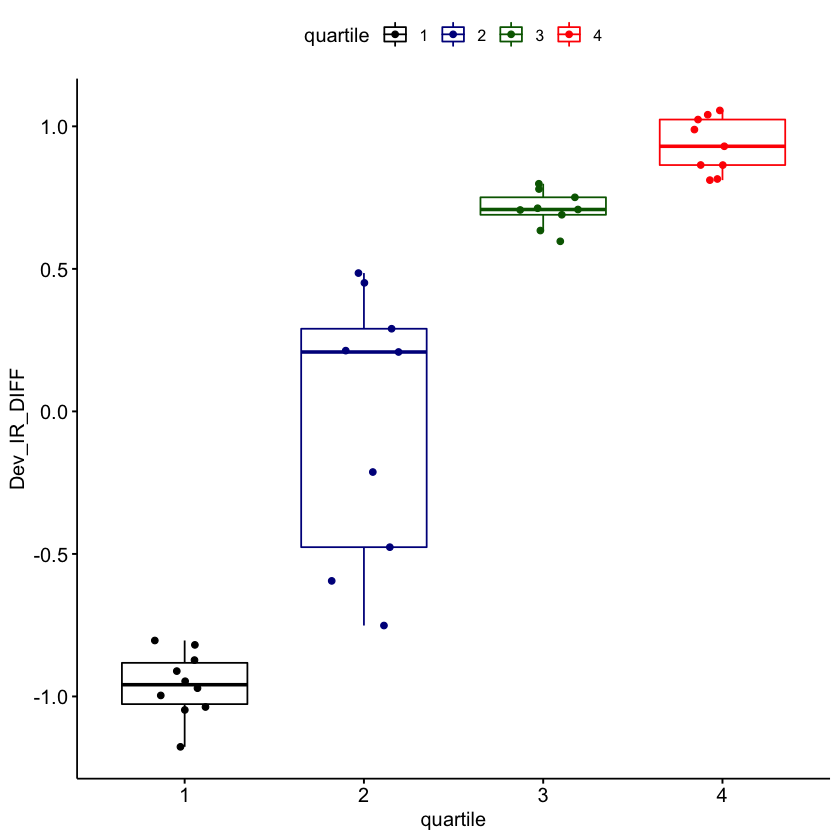

In [188]:
### boxplot of difference scores in quartiles
p <- ggboxplot(sub, x = "quartile", y = "Dev_IR_DIFF",
          color = "quartile", palette = c("black", "darkblue", "darkgreen", "red"),
          add = "jitter")
p

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


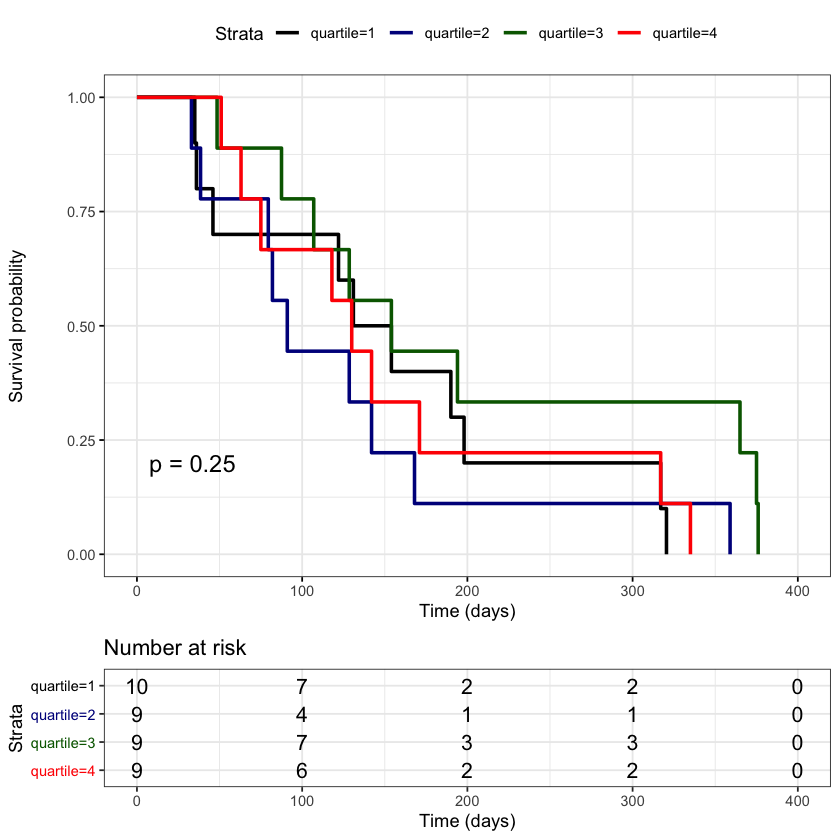

In [189]:
### survival analysis on quartiles
surv_object <- Surv(time = sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS, 
                    event = sub$STATUS
                   )
fit1 <- survfit(surv_object ~ quartile, 
                data = sub
               )

ggsurvplot(fit1, 
           data = sub, 
           pval = TRUE,
           #legend.labs = c("Developmental", "InjuryResponse"),
           palette = c("black", "darkblue", "darkgreen", "red"),
           risk.table = T,
           xlab = "Time (days)",
           ggtheme = theme_bw()
          )

Warning message in wilcox.test.default(c(320.5, 122, 36, 46, 317, 131, 190, 154, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(320.5, 122, 36, 46, 317, 131, 190, 154, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(91, 128.5, 33, 168, 82, 359, 38.5, 142, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(91, 128.5, 33, 168, 82, 359, 38.5, 142, :
“cannot compute exact p-value with ties”


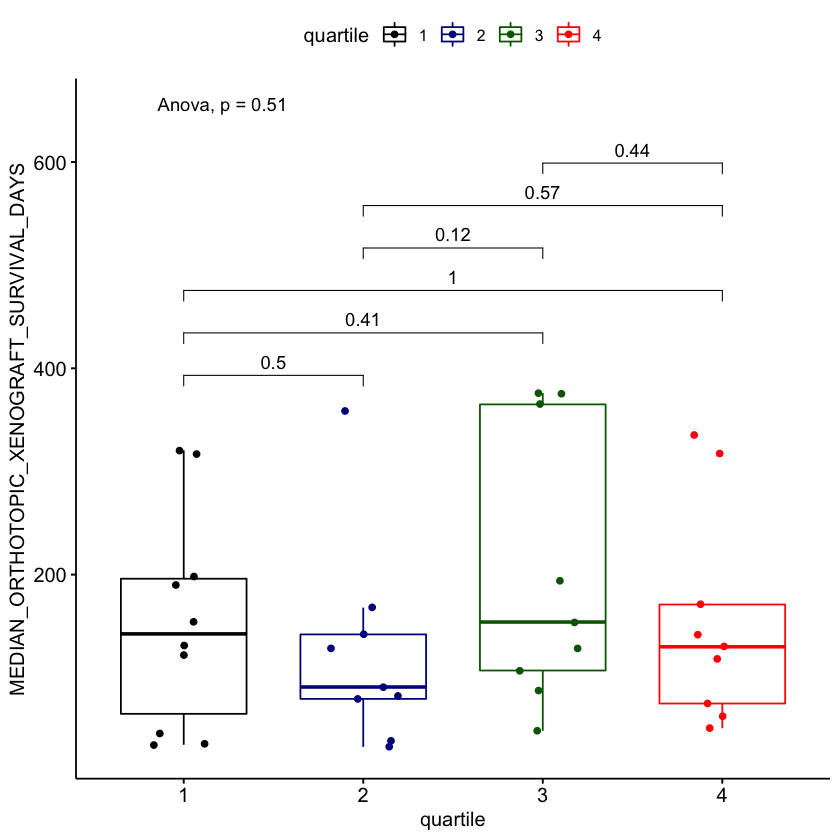

In [200]:
### boxplot of survival

my_comparisons <- list( c("1", "2"), 
                       c("1", "3"), 
                       c("1", "4"),
                       c("2", "3"),
                       c("2", "4"),
                       c("3", "4")
                      )
p <- ggboxplot(sub, x = "quartile", y = "MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS",
          color = "quartile", palette = c("black", "darkblue", "darkgreen", "red"),
          add = "jitter") + stat_compare_means(comparisons = my_comparisons)+ # Add pairwise comparisons p-value
  stat_compare_means(label.y = 650, method = "anova")
p

[1] 19 20

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


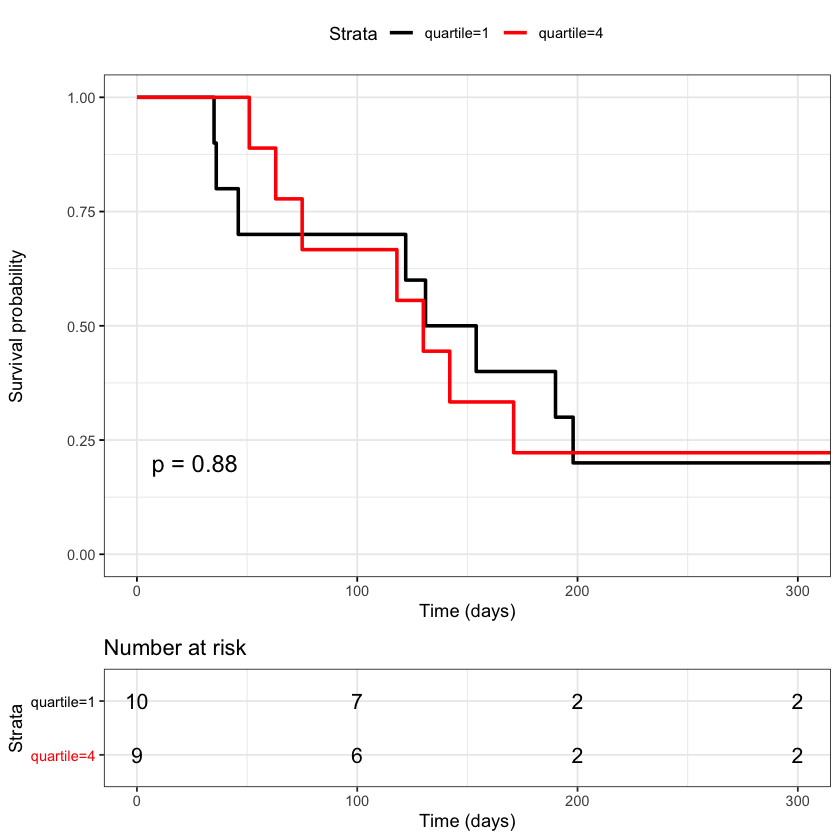

In [218]:
### top and bottom quartiles
keep <- c(1,4)
sub <- sub[sub$quartile %in% keep, ]
dim(sub)

### survival analysis on quartiles
surv_object <- Surv(time = sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS, 
                    event = sub$STATUS
                   )
fit1 <- survfit(surv_object ~ quartile, 
                data = sub
               )

ggsurvplot(fit1, 
           data = sub, 
           pval = TRUE,
           #legend.labs = c("Developmental", "InjuryResponse"),
           palette = c("black", "red"),
           risk.table = T,
           xlab = "Time (days)",
           ggtheme = theme_bw()
          )

---
### 1.8 Break samples into tertiles based on bulk RNA gradient
---

In [213]:
sub <- dat[!is.na(dat$BULK_RNASEQ_CLASSIFICATION), ]
remove <- c("N.A.", "N.D.", "NoTumours", "Underway")
sub <- dat[!dat$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS %in% remove, ]
sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS <- as.numeric(as.character(sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS))

### calculate position on gradient 
### substract Dev - IR scores
sub$Dev_IR_DIFF <- sub$DEVELOPMENTAL_GSVA - sub$INJURYRESPONSE_GSVA

##order sub by Diff
sub <- sub[order(sub$Dev_IR_DIFF), ]
sub$Rank <- seq(1:nrow(sub))
sub <- sub[!is.na(sub$BULK_RNASEQ_CLASSIFICATION), ]
##break into quartiles based on difference
sub$tertile <- dplyr::ntile(sub$Dev_IR_DIFF, 3) 

sub$STATUS <- 1

dim(sub)

[1] 37 20

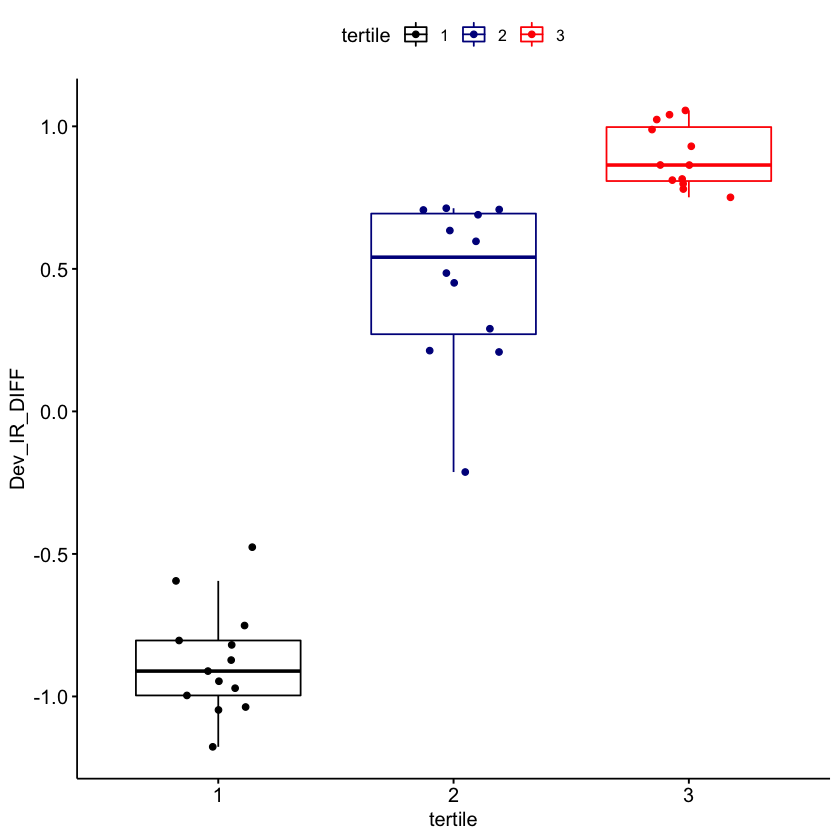

In [206]:
### boxplot of difference scores in quartiles
p <- ggboxplot(sub, x = "tertile", y = "Dev_IR_DIFF",
          color = "tertile", palette = c("black", "darkblue", "red"),
          add = "jitter")
p

Warning message in wilcox.test.default(c(320.5, 122, 36, 46, 317, 131, 190, 154, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(320.5, 122, 36, 46, 317, 131, 190, 154, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(168, 82, 359, 38.5, 142, 79.5, 194, 365, :
“cannot compute exact p-value with ties”


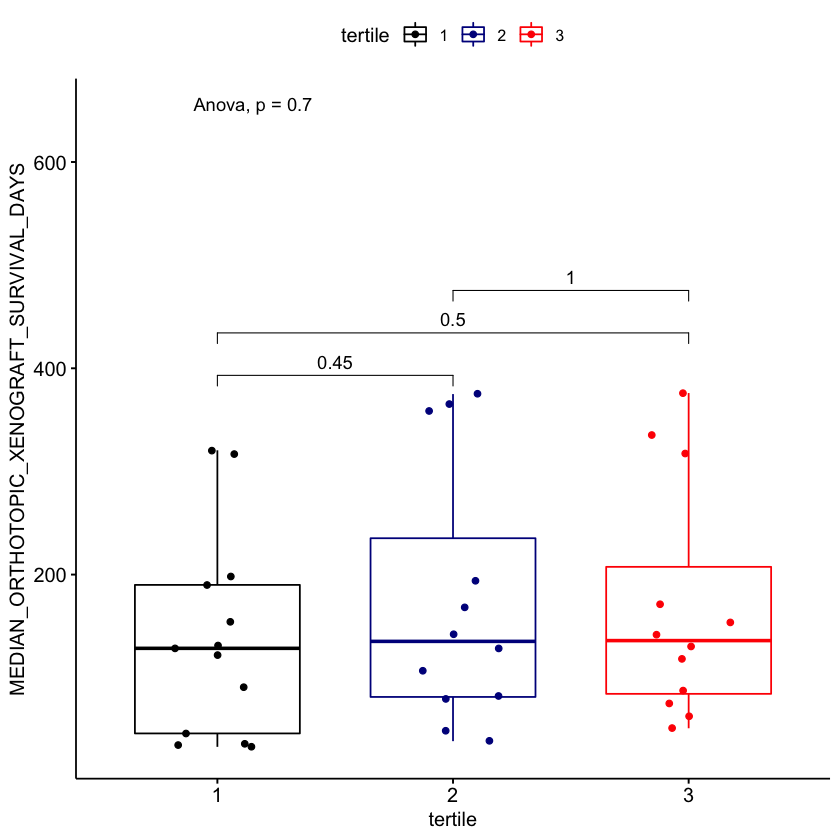

In [207]:
### boxplot of survival

my_comparisons <- list( c("1", "2"), 
                       c("1", "3"), 
                       c("2", "3")
                      )
p <- ggboxplot(sub, x = "tertile", y = "MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS",
          color = "tertile", palette = c("black", "darkblue", "red"),
          add = "jitter") + stat_compare_means(comparisons = my_comparisons)+ # Add pairwise comparisons p-value
  stat_compare_means(label.y = 650, method = "anova")
p

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


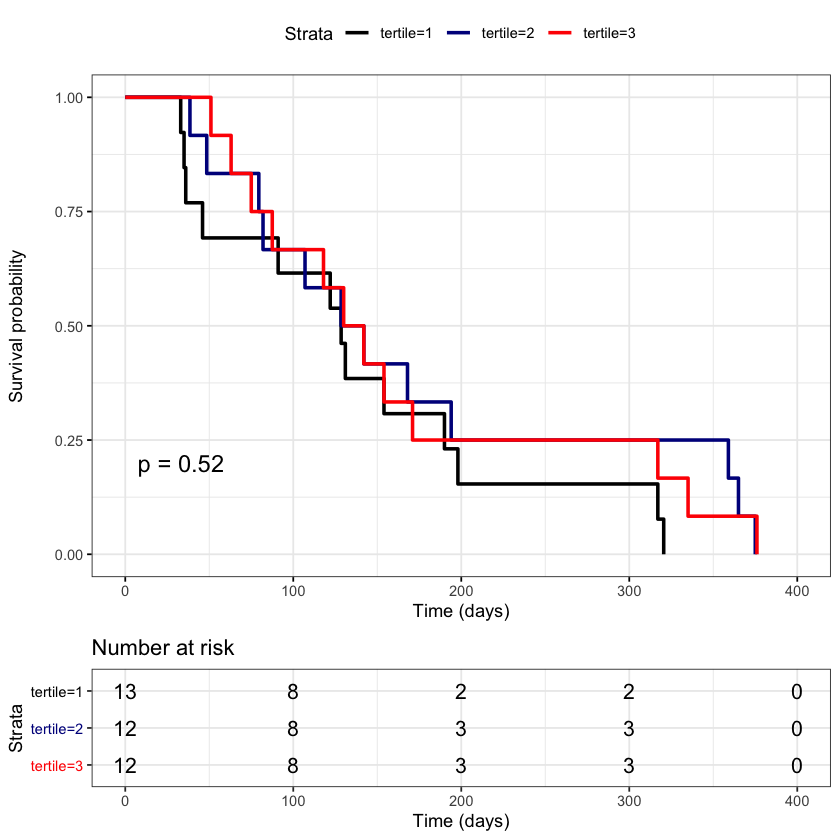

In [208]:
### survival analysis on quartiles
surv_object <- Surv(time = sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS, 
                    event = sub$STATUS
                   )
fit1 <- survfit(surv_object ~ tertile, 
                data = sub
               )

ggsurvplot(fit1, 
           data = sub, 
           pval = TRUE,
           #legend.labs = c("Developmental", "InjuryResponse"),
           palette = c("black", "darkblue", "red"),
           risk.table = T,
           xlab = "Time (days)",
           ggtheme = theme_bw()
          )

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


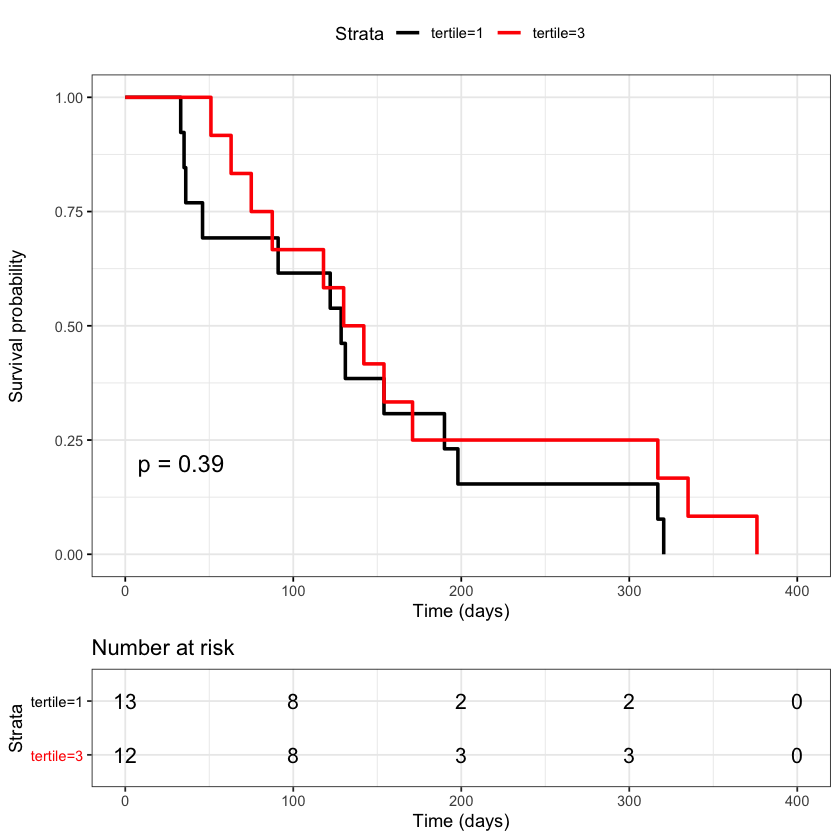

In [216]:
### top and bottom tertiles
keep <- c(1,3)
sub <- sub[sub$tertile %in% keep, ]
dim(sub)

### survival analysis on quartiles
surv_object <- Surv(time = sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS, 
                    event = sub$STATUS
                   )
fit1 <- survfit(surv_object ~ tertile, 
                data = sub
               )

ggsurvplot(fit1, 
           data = sub, 
           pval = TRUE,
           #legend.labs = c("Developmental", "InjuryResponse"),
           palette = c("black", "red"),
           risk.table = T,
           xlab = "Time (days)",
           ggtheme = theme_bw()
          )

---
## 2.0 Correlate survival and GSVA scores
---

---
### 2.1 All samples
---

In [91]:
remove <- c("N.A.", "N.D.", "NoTumours", "Underway")
sub <- dat[!dat$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS %in% remove, ]
sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS <- as.numeric(as.character(sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS))
sub <- sub[!is.na(sub$BULK_RNASEQ_CLASSIFICATION), ]
dim(sub)

[1] 37 16

`geom_smooth()` using formula 'y ~ x'



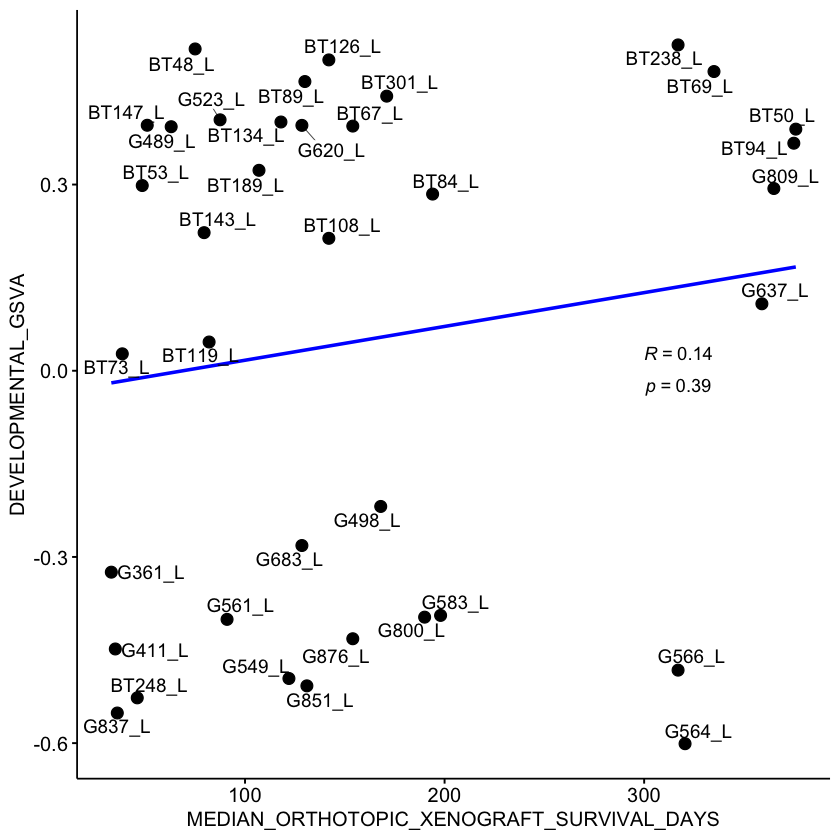

In [101]:
ggscatter(sub,
          x = "MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS",
          y = "DEVELOPMENTAL_GSVA",
          size = 3,
          add = "reg.line",
          add.params = list(color = "blue", fill = "lightgray"),
          add.conf.int = TRUE,
          cor.coef = TRUE,
          cor.coeff.args = list(method = "spearman", label.x = 300, label.y = 0, label.sep = "\n"),
          label = "SAMPLE_ID",
          repel = T
    )

`geom_smooth()` using formula 'y ~ x'



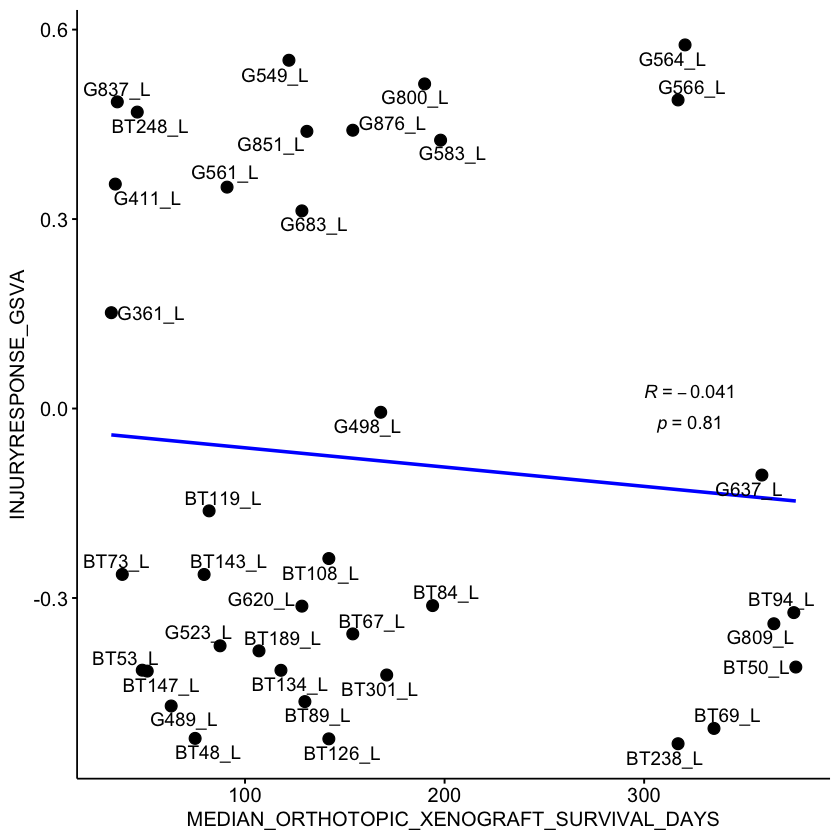

In [100]:
ggscatter(sub,
          x = "MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS",
          y = "INJURYRESPONSE_GSVA",
          size = 3,
          add = "reg.line",
          add.params = list(color = "blue", fill = "lightgray"),
          add.conf.int = TRUE,
          cor.coef = TRUE,
          cor.coeff.args = list(method = "spearman", label.x = 300, label.y = 0, label.sep = "\n"),
          label = "SAMPLE_ID",
          repel = T
    )

---
### 2.2 Dirks samples only
---

In [103]:
lab <- "Dirks"

remove <- c("N.A.", "N.D.", "NoTumours", "Underway")
sub <- dat[!dat$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS %in% remove, ]
sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS <- as.numeric(as.character(sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS))
sub <- sub[!is.na(sub$BULK_RNASEQ_CLASSIFICATION), ]
sub <- sub[sub$LAB == lab, ]
dim(sub)

[1] 18 16

`geom_smooth()` using formula 'y ~ x'



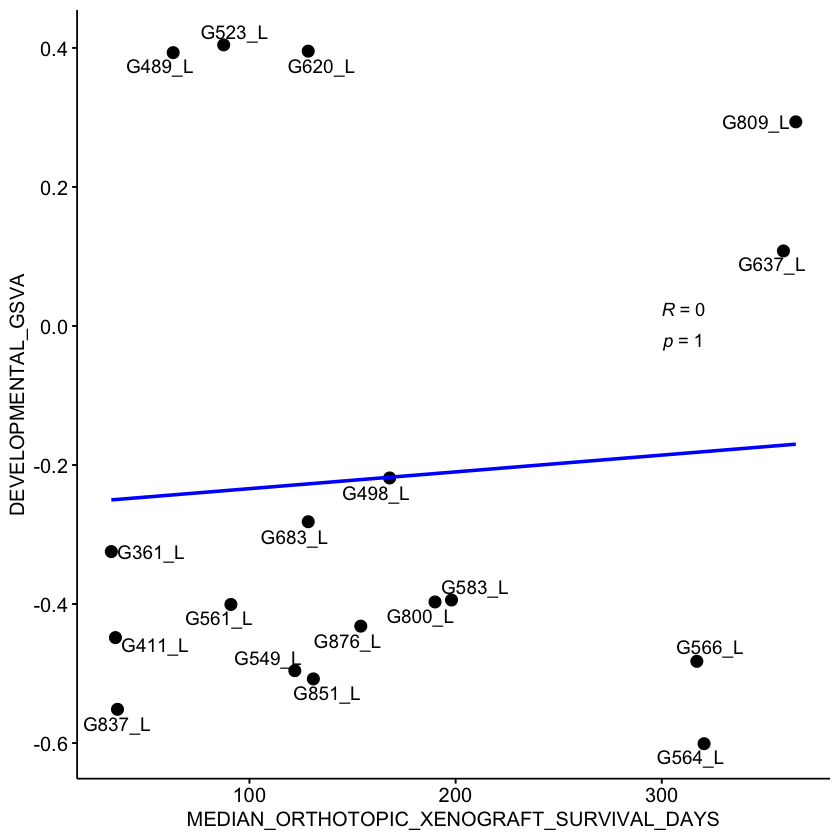

In [104]:
ggscatter(sub,
          x = "MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS",
          y = "DEVELOPMENTAL_GSVA",
          size = 3,
          add = "reg.line",
          add.params = list(color = "blue", fill = "lightgray"),
          add.conf.int = TRUE,
          cor.coef = TRUE,
          cor.coeff.args = list(method = "spearman", label.x = 300, label.y = 0, label.sep = "\n"),
          label = "SAMPLE_ID",
          repel = T
    )

ggscatter(sub,
          x = "MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS",
          y = "INJURYRESPONSE_GSVA",
          size = 3,
          add = "reg.line",
          add.params = list(color = "blue", fill = "lightgray"),
          add.conf.int = TRUE,
          cor.coef = TRUE,
          cor.coeff.args = list(method = "spearman", label.x = 300, label.y = 0, label.sep = "\n"),
          label = "SAMPLE_ID",
          repel = T
    )

---
### 2.3 Weiss samples only
---

In [106]:
lab <- "Weiss"

remove <- c("N.A.", "N.D.", "NoTumours", "Underway")
sub <- dat[!dat$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS %in% remove, ]
sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS <- as.numeric(as.character(sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS))
sub <- sub[!is.na(sub$BULK_RNASEQ_CLASSIFICATION), ]
sub <- sub[sub$LAB == lab, ]
dim(sub)

[1] 19 16

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



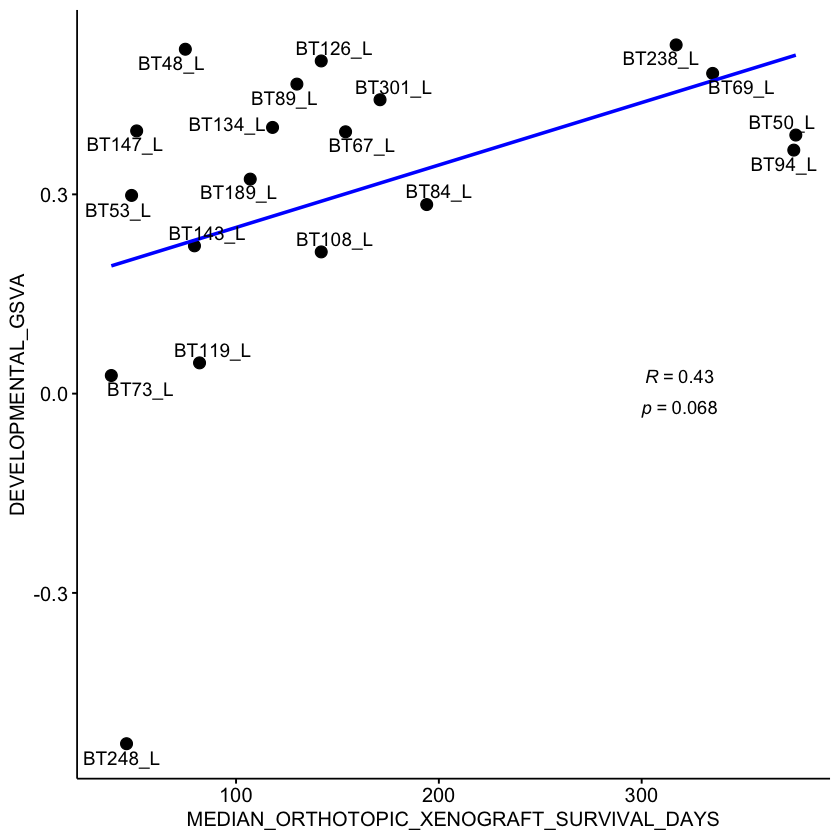

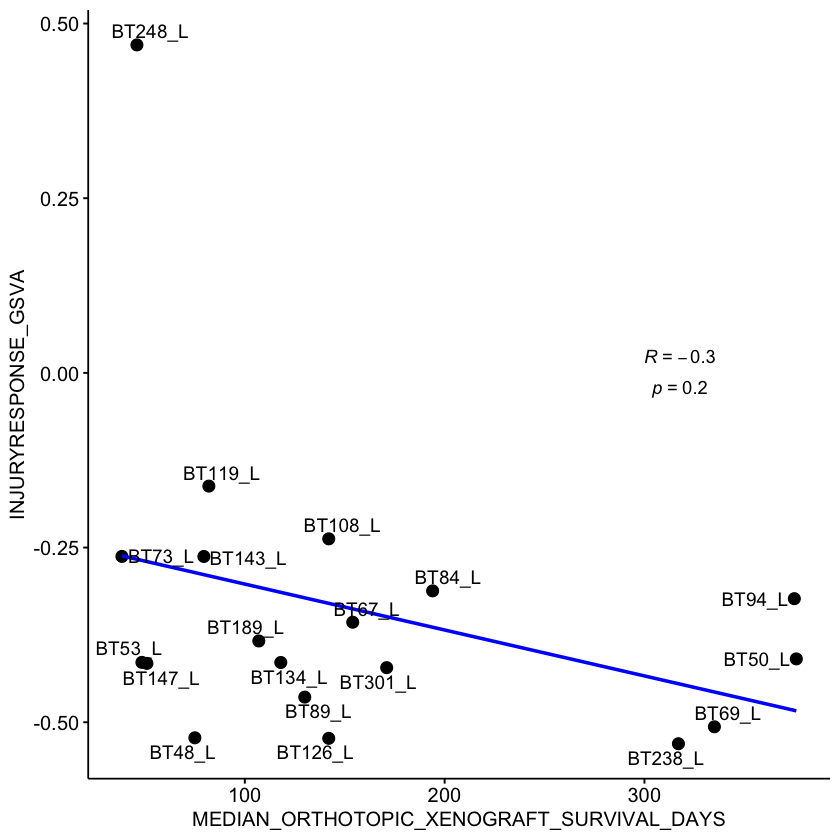

In [107]:
ggscatter(sub,
          x = "MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS",
          y = "DEVELOPMENTAL_GSVA",
          size = 3,
          add = "reg.line",
          add.params = list(color = "blue", fill = "lightgray"),
          add.conf.int = TRUE,
          cor.coef = TRUE,
          cor.coeff.args = list(method = "spearman", label.x = 300, label.y = 0, label.sep = "\n"),
          label = "SAMPLE_ID",
          repel = T
    )

ggscatter(sub,
          x = "MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS",
          y = "INJURYRESPONSE_GSVA",
          size = 3,
          add = "reg.line",
          add.params = list(color = "blue", fill = "lightgray"),
          add.conf.int = TRUE,
          cor.coef = TRUE,
          cor.coeff.args = list(method = "spearman", label.x = 300, label.y = 0, label.sep = "\n"),
          label = "SAMPLE_ID",
          repel = T
    )

---
### 2.4 Position on gradient (bulk RNA)
---

In [125]:
sub <- dat[!is.na(dat$BULK_RNASEQ_CLASSIFICATION), ]
dim(sub)

### calculate position on gradient 
### substract Dev - IR scores
sub$Dev_IR_DIFF <- sub$DEVELOPMENTAL_GSVA - sub$INJURYRESPONSE_GSVA

##order sub by Diff
sub <- sub[order(sub$Dev_IR_DIFF), ]
sub$Rank <- seq(1:72)

[1] 72 16

Warning message in if (color %in% names(data) & is.null(add.params$color)) add.params$color <- color:
“the condition has length > 1 and only the first element will be used”


[1] 37 18

Warning message in if (color %in% names(data) & is.null(add.params$color)) add.params$color <- color:
“the condition has length > 1 and only the first element will be used”


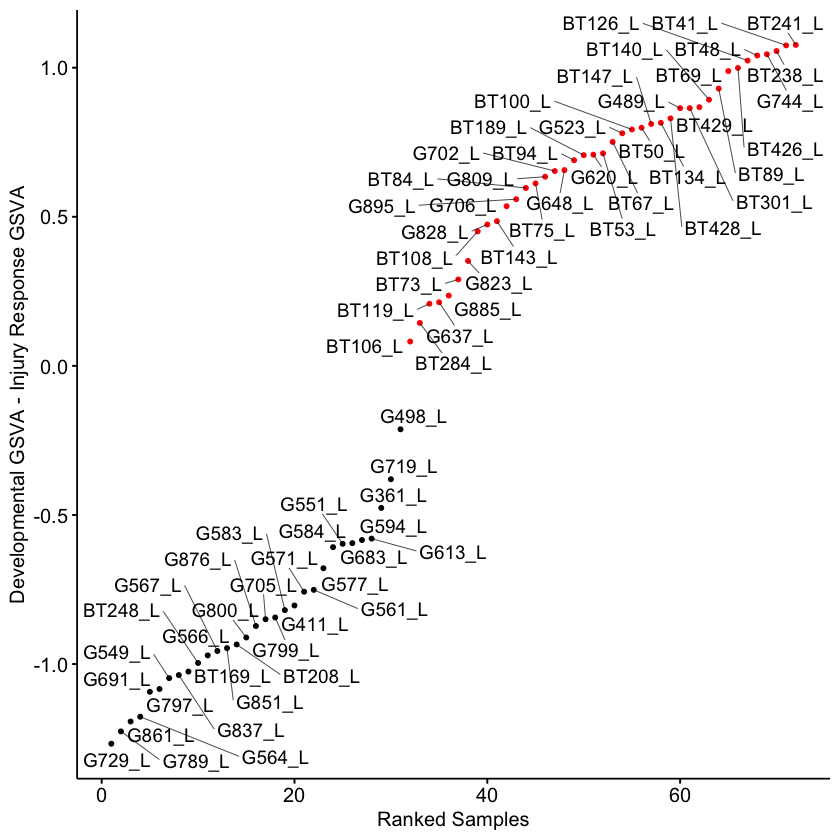

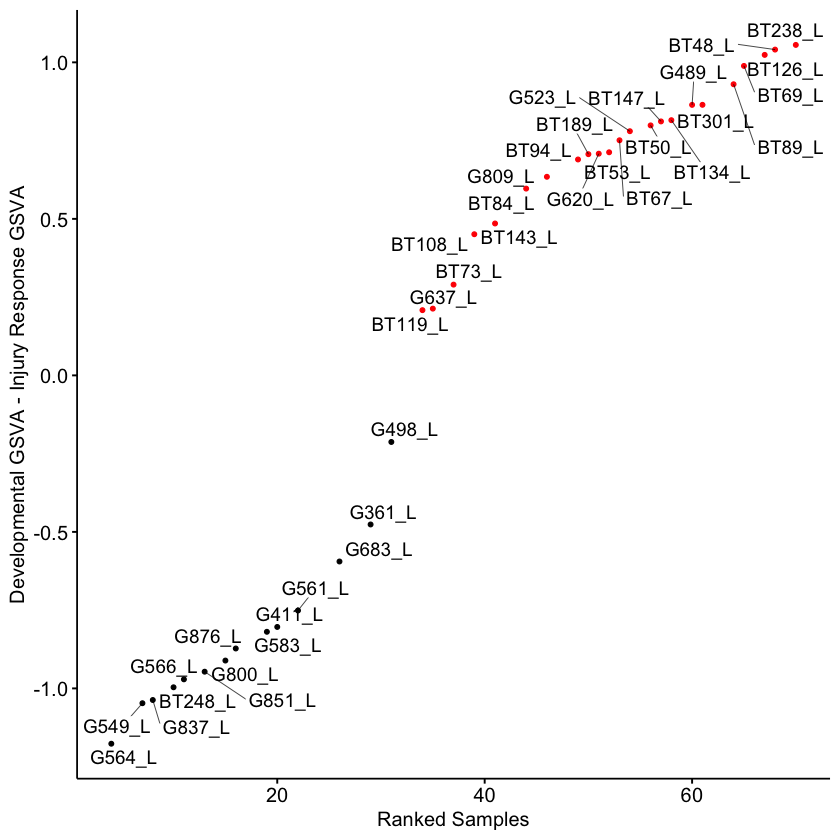

In [135]:
### plot the gradient rank all sampels (72) 
ggscatter(sub,
          x = "Rank",
          y = "Dev_IR_DIFF",
          size = 1,
          label = "SAMPLE_ID",
          repel = T,
          xlab = "Ranked Samples",
          ylab = "Developmental GSVA - Injury Response GSVA",
          col = ifelse(sub$BULK_RNASEQ_CLASSIFICATION == "Developmental", "red", "black")
    )

### plot the gradient rank for samples with xenograft information
remove <- c("N.A.", "N.D.", "NoTumours", "Underway")
sub <- sub[!sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS %in% remove, ]
sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS <- as.numeric(as.character(sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS))
dim(sub)
ggscatter(sub,
          x = "Rank",
          y = "Dev_IR_DIFF",
          size = 1,
          label = "SAMPLE_ID",
          repel = T,
          xlab = "Ranked Samples",
          ylab = "Developmental GSVA - Injury Response GSVA",
          col = ifelse(sub$BULK_RNASEQ_CLASSIFICATION == "Developmental", "red", "black")
    )

Warning message in if (color %in% names(data) & is.null(add.params$color)) add.params$color <- color:
“the condition has length > 1 and only the first element will be used”


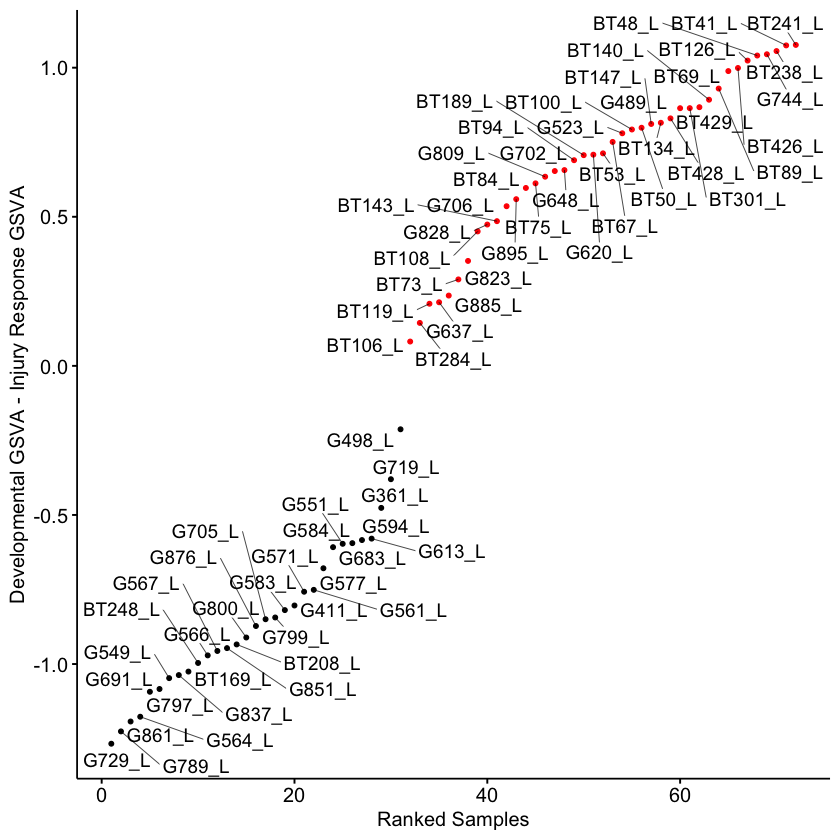

In [133]:
### susbet into only those with survival data
sub 

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



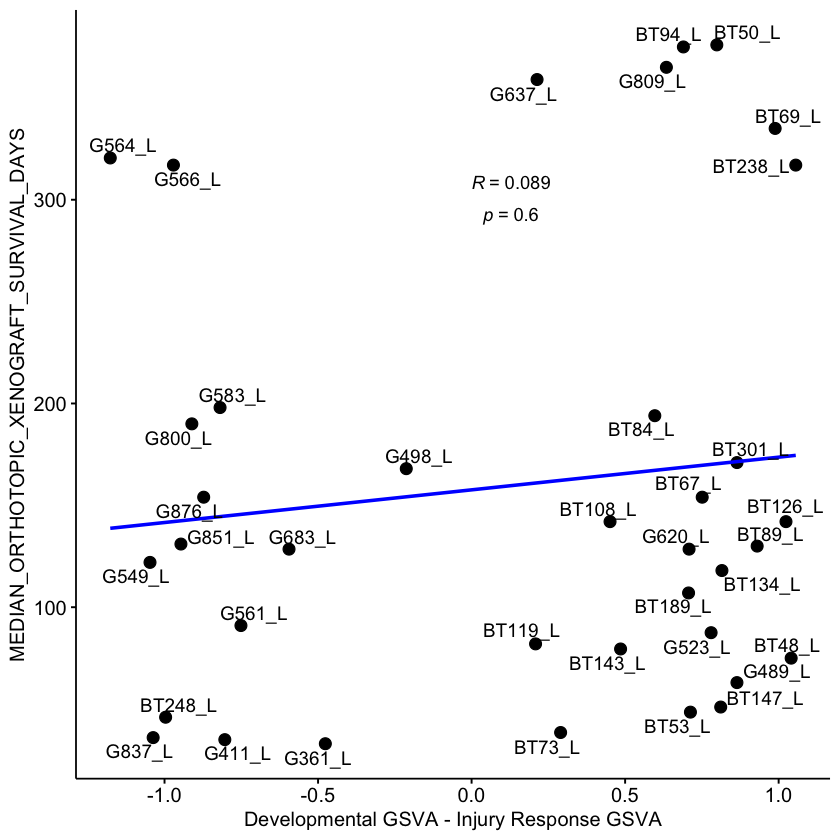

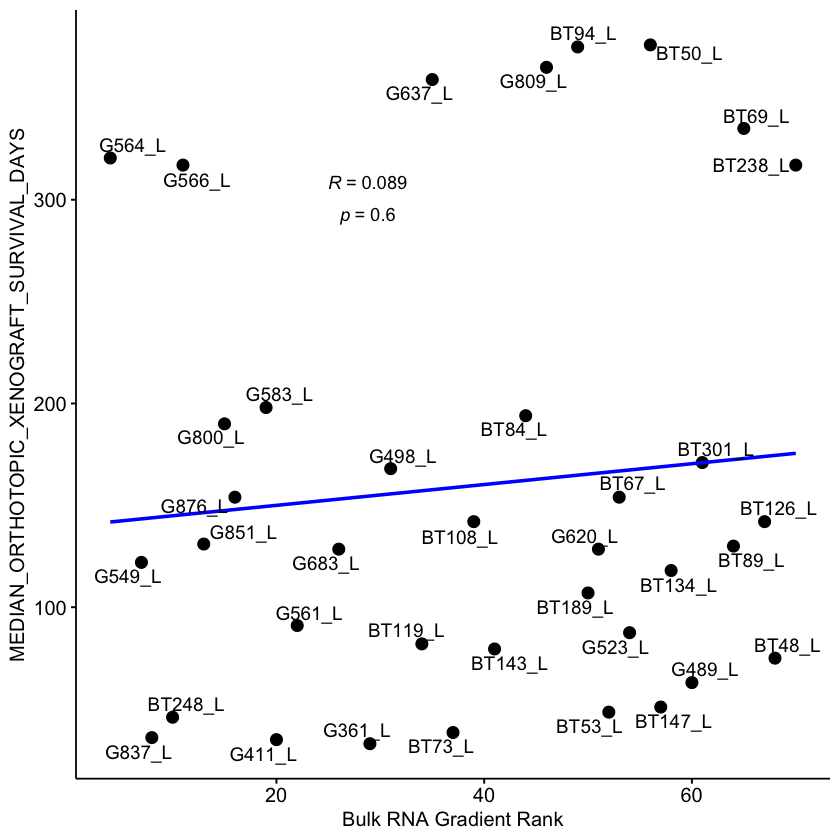

In [147]:
ggscatter(sub,
          y = "MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS",
          x = "Dev_IR_DIFF",
          size = 3,
          add = "reg.line",
          add.params = list(color = "blue", fill = "lightgray"),
          add.conf.int = TRUE,
          cor.coef = TRUE,
          cor.coeff.args = list(method = "spearman", label.y = 300, label.x = 0, label.sep = "\n"),
          label = "SAMPLE_ID",
          repel = T,
          xlab = "Developmental GSVA - Injury Response GSVA"
    )


ggscatter(sub,
          y = "MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS",
          x = "Rank",
          size = 3,
          add = "reg.line",
          add.params = list(color = "blue", fill = "lightgray"),
          add.conf.int = TRUE,
          cor.coef = TRUE,
          cor.coeff.args = list(method = "spearman", label.y = 300, label.x = 25, label.sep = "\n"),
          label = "SAMPLE_ID",
          repel = T,
          xlab = "Bulk RNA Gradient Rank"
    )


---
## 3.0 Correlation in vitro LDA / sphere formation
---

---
### 3.1 GSVA scores, all samples
---

In [284]:
remove <- c("N.A.", "N.D.", "NoTumours", "Underway")
sub <- dat[!dat$SPHERE_FORMATION_CAPACITY %in% remove, ]
sub$SPHERE_FORMATION_CAPACITY <- as.numeric(as.character(sub$SPHERE_FORMATION_CAPACITY))
sub <- sub[!is.na(sub$BULK_RNASEQ_CLASSIFICATION), ]
dim(sub)

ggscatter(sub,
          x = "SPHERE_FORMATION_CAPACITY",
          y = "DEVELOPMENTAL_GSVA",
          size = 3,
          add = "reg.line",
          add.params = list(color = "blue", fill = "lightgray"),
          add.conf.int = TRUE,
          cor.coef = TRUE,
          cor.coeff.args = list(method = "spearman", label.x = 60, label.y = 0, label.sep = "\n"),
          label = "SAMPLE_ID",
          repel = T
    )

ggscatter(sub,
          x = "SPHERE_FORMATION_CAPACITY",
          y = "INJURYRESPONSE_GSVA",
          size = 3,
          add = "reg.line",
          add.params = list(color = "blue", fill = "lightgray"),
          add.conf.int = TRUE,
          cor.coef = TRUE,
          cor.coeff.args = list(method = "spearman", label.x = 60, label.y = 0, label.sep = "\n"),
          label = "SAMPLE_ID",
          repel = T
    )

[1] 55 16

[1] 54 16

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



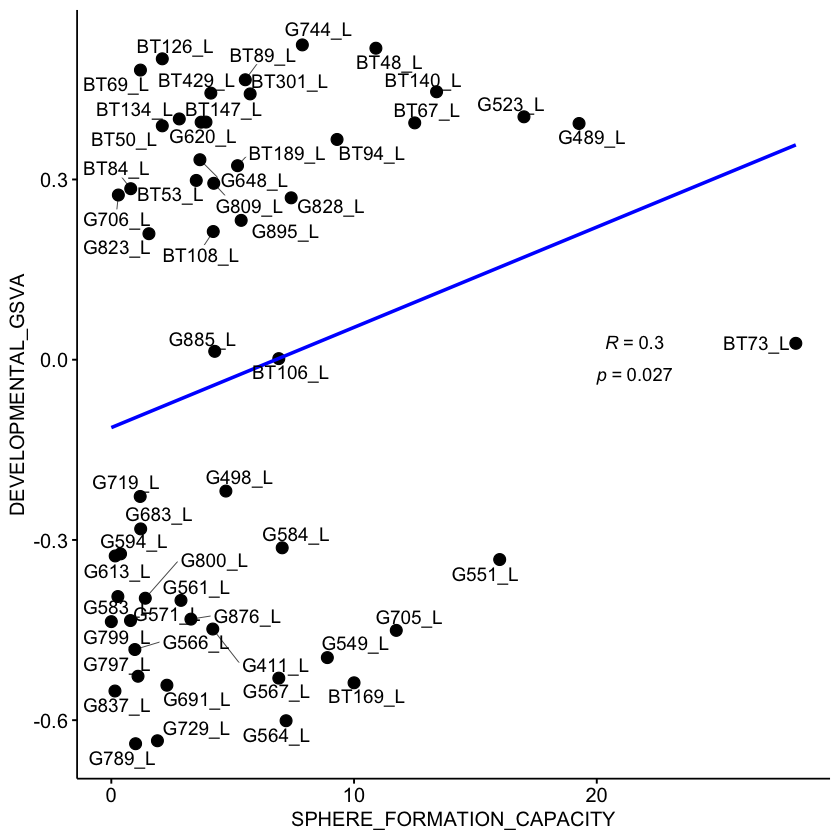

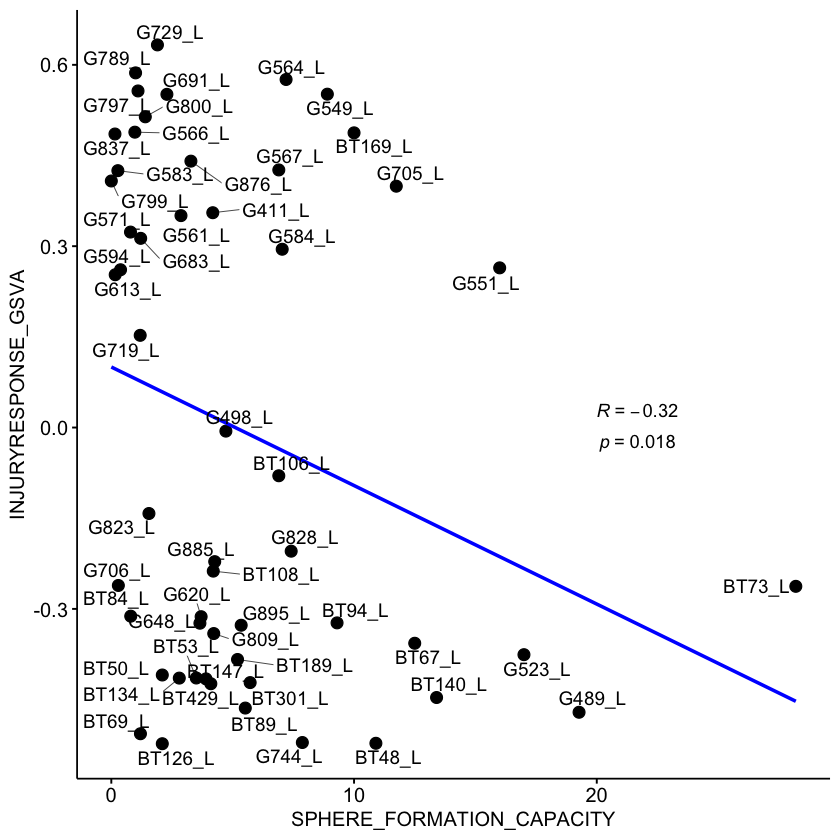

In [293]:
### remove outlier G702_L
sub2 <- sub[!sub$SPHERE_FORMATION_CAPACITY == 100, ]
dim(sub2)

ggscatter(sub2,
          x = "SPHERE_FORMATION_CAPACITY",
          y = "DEVELOPMENTAL_GSVA",
          size = 3,
          add = "reg.line",
          add.params = list(color = "blue", fill = "lightgray"),
          add.conf.int = TRUE,
          cor.coef = TRUE,
          cor.coeff.args = list(method = "spearman", label.x = 20, label.y = 0, label.sep = "\n"),
          label = "SAMPLE_ID",
          repel = T
    )

ggscatter(sub2,
          x = "SPHERE_FORMATION_CAPACITY",
          y = "INJURYRESPONSE_GSVA",
          size = 3,
          add = "reg.line",
          add.params = list(color = "blue", fill = "lightgray"),
          add.conf.int = TRUE,
          cor.coef = TRUE,
          cor.coeff.args = list(method = "spearman", label.x = 20, label.y = 0, label.sep = "\n"),
          label = "SAMPLE_ID",
          repel = T
    )

---
### 3.2 Dirks samples only
---

[1] 35 16

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



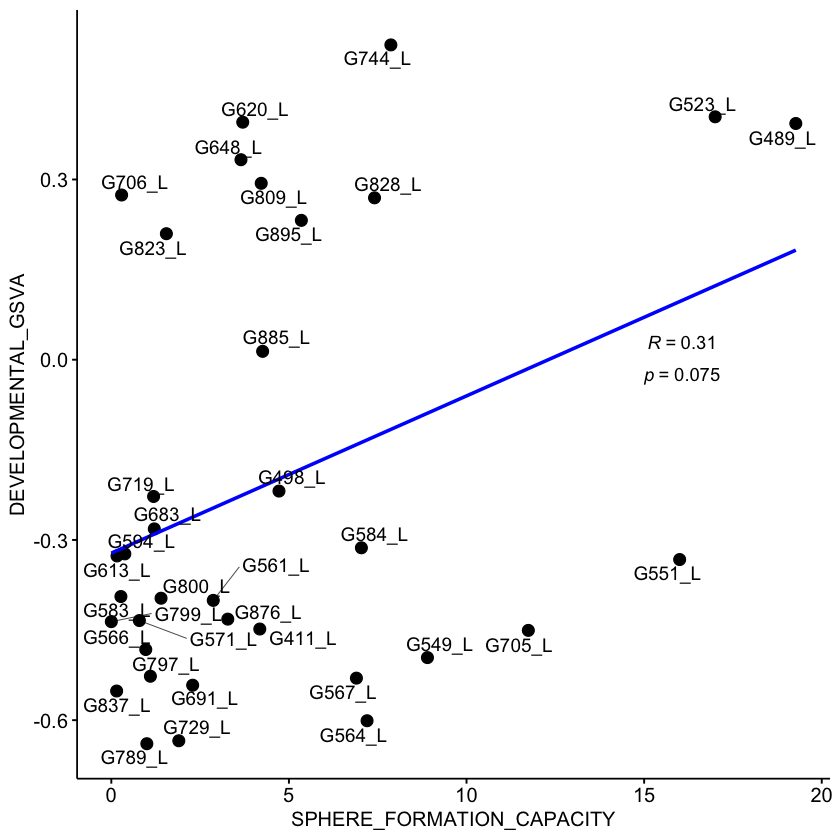

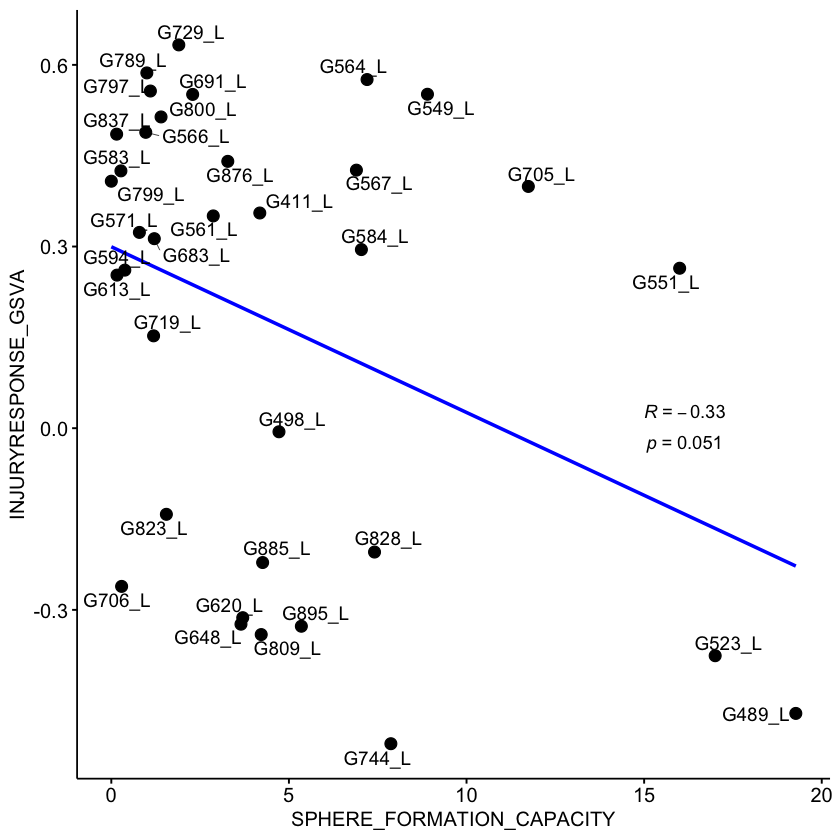

In [294]:
lab <- "Dirks"
sub2 <- sub2[sub2$LAB == lab, ]
dim(sub2)

ggscatter(sub2,
          x = "SPHERE_FORMATION_CAPACITY",
          y = "DEVELOPMENTAL_GSVA",
          size = 3,
          add = "reg.line",
          add.params = list(color = "blue", fill = "lightgray"),
          add.conf.int = TRUE,
          cor.coef = TRUE,
          cor.coeff.args = list(method = "spearman", label.x = 15, label.y = 0, label.sep = "\n"),
          label = "SAMPLE_ID",
          repel = T
    )

ggscatter(sub2,
          x = "SPHERE_FORMATION_CAPACITY",
          y = "INJURYRESPONSE_GSVA",
          size = 3,
          add = "reg.line",
          add.params = list(color = "blue", fill = "lightgray"),
          add.conf.int = TRUE,
          cor.coef = TRUE,
          cor.coeff.args = list(method = "spearman", label.x = 15, label.y = 0, label.sep = "\n"),
          label = "SAMPLE_ID",
          repel = T
    )

---
### 3.3 Weiss Samples Only
---

[1] 19 16

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



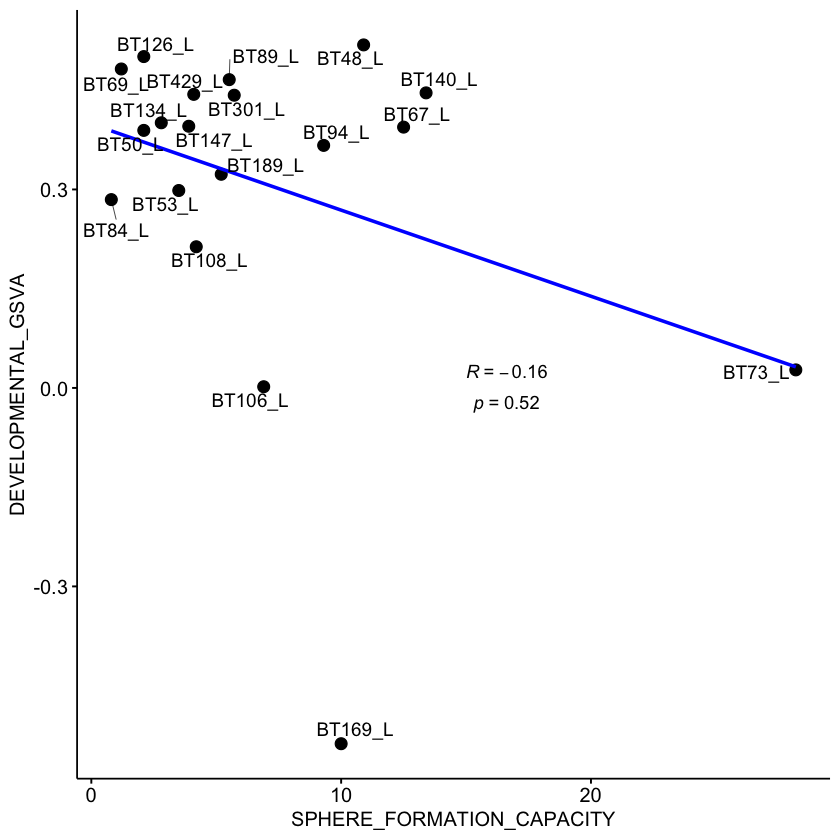

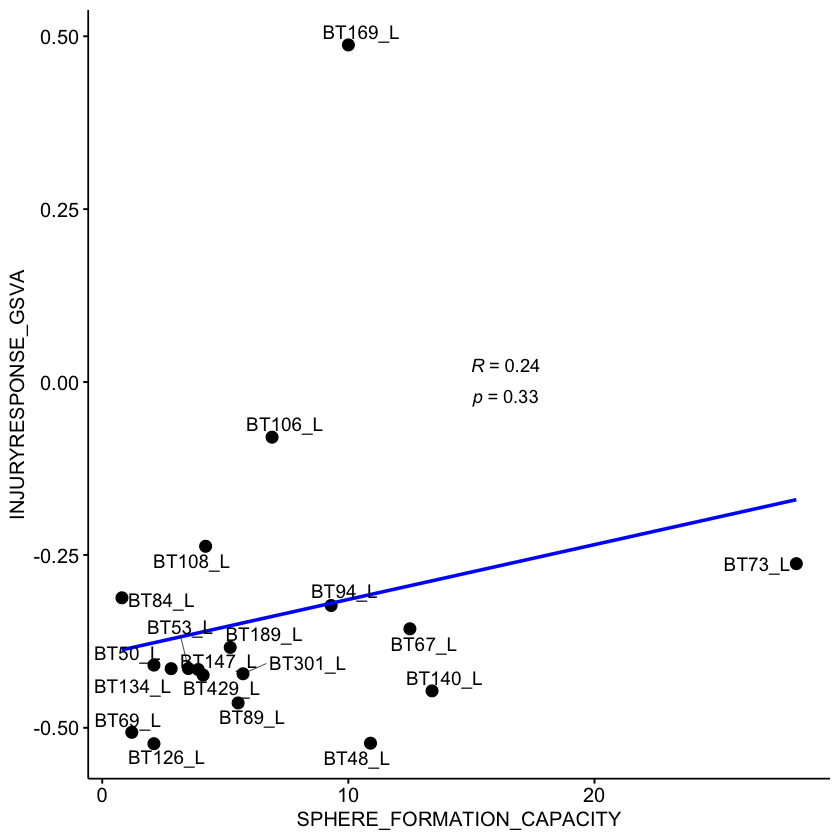

In [295]:
lab <- "Weiss"
sub2 <- sub[sub$LAB == lab, ]
dim(sub2)

ggscatter(sub2,
          x = "SPHERE_FORMATION_CAPACITY",
          y = "DEVELOPMENTAL_GSVA",
          size = 3,
          add = "reg.line",
          add.params = list(color = "blue", fill = "lightgray"),
          add.conf.int = TRUE,
          cor.coef = TRUE,
          cor.coeff.args = list(method = "spearman", label.x = 15, label.y = 0, label.sep = "\n"),
          label = "SAMPLE_ID",
          repel = T
    )

ggscatter(sub2,
          x = "SPHERE_FORMATION_CAPACITY",
          y = "INJURYRESPONSE_GSVA",
          size = 3,
          add = "reg.line",
          add.params = list(color = "blue", fill = "lightgray"),
          add.conf.int = TRUE,
          cor.coef = TRUE,
          cor.coeff.args = list(method = "spearman", label.x = 15, label.y = 0, label.sep = "\n"),
          label = "SAMPLE_ID",
          repel = T
    )

---
### 3.3 Position on bulk RNA gradient - all samples
---

In [298]:
sub <- dat[!is.na(dat$BULK_RNASEQ_CLASSIFICATION), ]
dim(sub)

### calculate position on gradient 
### substract Dev - IR scores
sub$Dev_IR_DIFF <- sub$DEVELOPMENTAL_GSVA - sub$INJURYRESPONSE_GSVA

##order sub by Diff
sub <- sub[order(sub$Dev_IR_DIFF), ]
sub$Rank <- seq(1:72)

remove <- c("N.A.", "N.D.", "NoTumours", "Underway")
sub <- sub[!sub$SPHERE_FORMATION_CAPACITY %in% remove, ]
sub$SPHERE_FORMATION_CAPACITY <- as.numeric(as.character(sub$SPHERE_FORMATION_CAPACITY))
sub <- sub[!is.na(sub$BULK_RNASEQ_CLASSIFICATION), ]
sub <- sub[!sub$SPHERE_FORMATION_CAPACITY == 100, ]
dim(sub)

[1] 72 16

[1] 54 18

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



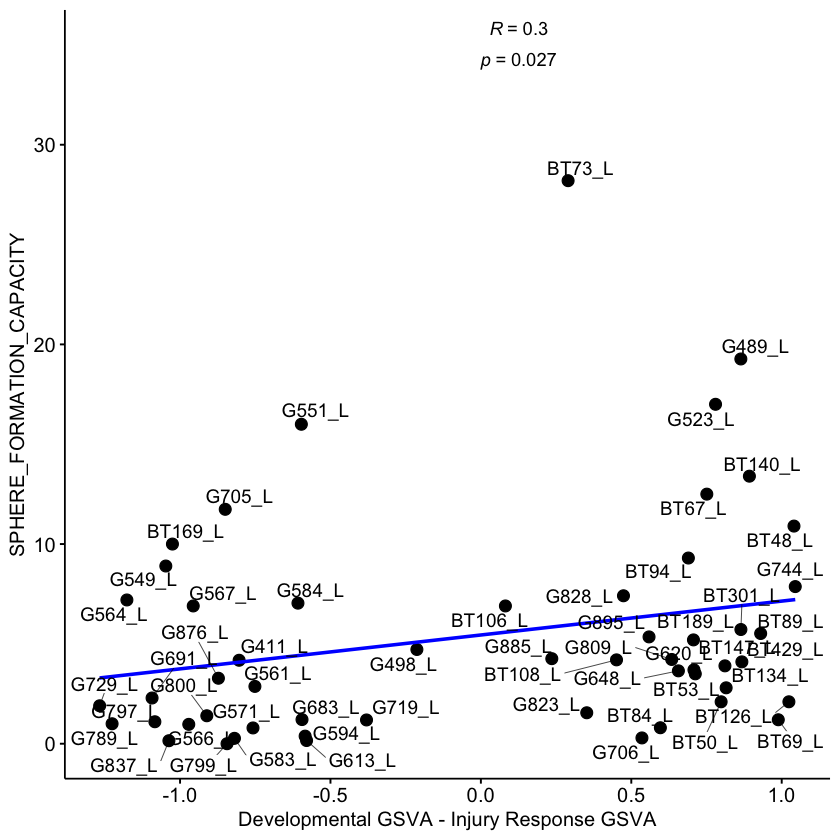

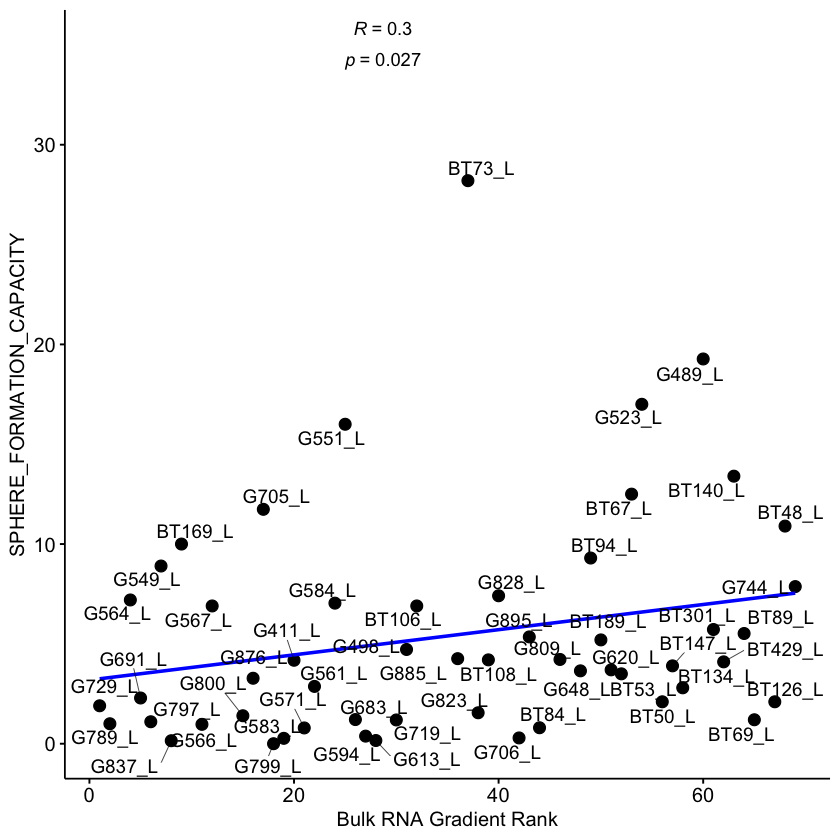

In [299]:
ggscatter(sub,
          y = "SPHERE_FORMATION_CAPACITY",
          x = "Dev_IR_DIFF",
          size = 3,
          add = "reg.line",
          add.params = list(color = "blue", fill = "lightgray"),
          add.conf.int = TRUE,
          cor.coef = TRUE,
          cor.coeff.args = list(method = "spearman", label.y = 35, label.x = 0, label.sep = "\n"),
          label = "SAMPLE_ID",
          repel = T,
          xlab = "Developmental GSVA - Injury Response GSVA"
    )


ggscatter(sub,
          y = "SPHERE_FORMATION_CAPACITY",
          x = "Rank",
          size = 3,
          add = "reg.line",
          add.params = list(color = "blue", fill = "lightgray"),
          add.conf.int = TRUE,
          cor.coef = TRUE,
          cor.coeff.args = list(method = "spearman", label.y = 35, label.x = 25, label.sep = "\n"),
          label = "SAMPLE_ID",
          repel = T,
          xlab = "Bulk RNA Gradient Rank"
    )


---
### 3.3b Position on bulk RNA gradient - Dirks only
---

In [300]:
sub <- sub[sub$LAB == "Dirks", ]
dim(sub)

[1] 35 18

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



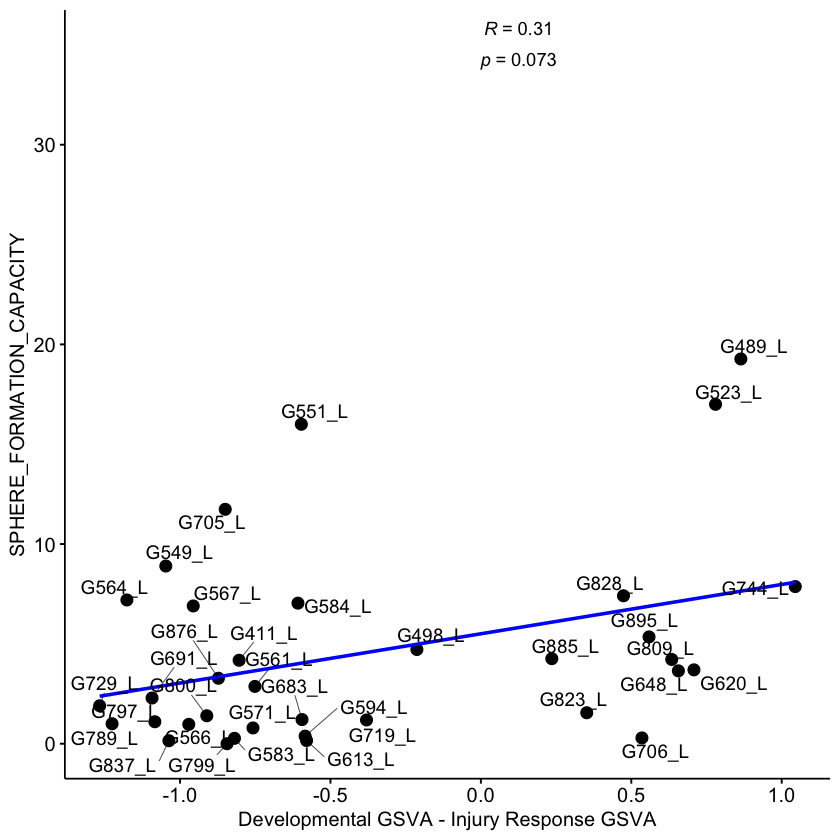

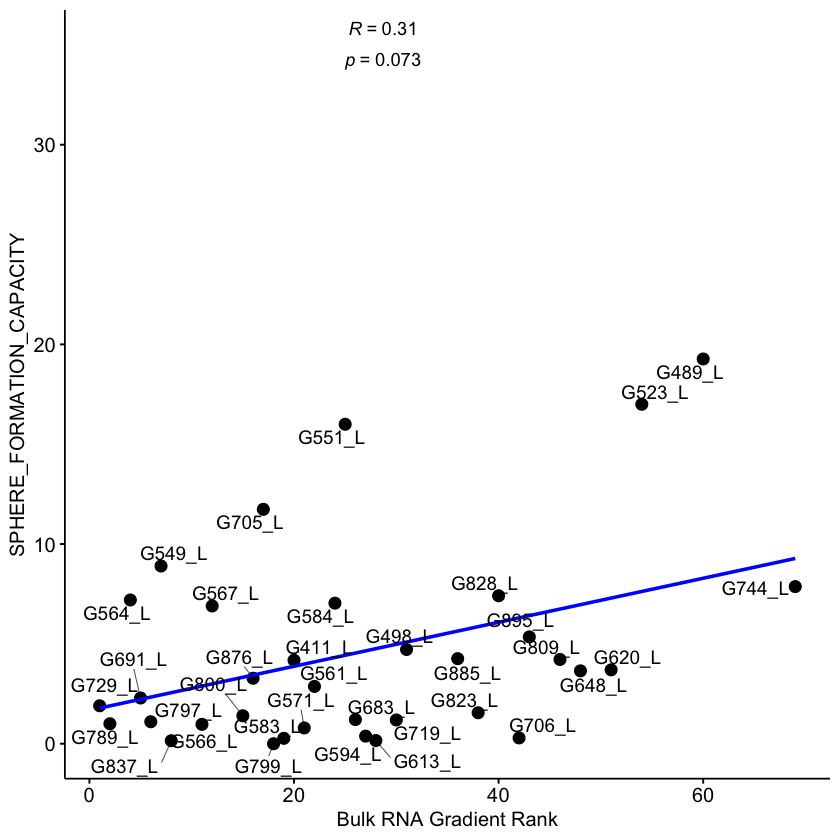

In [301]:
ggscatter(sub,
          y = "SPHERE_FORMATION_CAPACITY",
          x = "Dev_IR_DIFF",
          size = 3,
          add = "reg.line",
          add.params = list(color = "blue", fill = "lightgray"),
          add.conf.int = TRUE,
          cor.coef = TRUE,
          cor.coeff.args = list(method = "spearman", label.y = 35, label.x = 0, label.sep = "\n"),
          label = "SAMPLE_ID",
          repel = T,
          xlab = "Developmental GSVA - Injury Response GSVA"
    )


ggscatter(sub,
          y = "SPHERE_FORMATION_CAPACITY",
          x = "Rank",
          size = 3,
          add = "reg.line",
          add.params = list(color = "blue", fill = "lightgray"),
          add.conf.int = TRUE,
          cor.coef = TRUE,
          cor.coeff.args = list(method = "spearman", label.y = 35, label.x = 25, label.sep = "\n"),
          label = "SAMPLE_ID",
          repel = T,
          xlab = "Bulk RNA Gradient Rank"
    )


---
### 3.4 Compare SFC between Dev and IR bulk RNA classifications
---

In [280]:
remove <- c("N.A.", "N.D.", "NoTumours", "Underway")
sub <- dat[!dat$SPHERE_FORMATION_CAPACITY %in% remove, ]
sub$SPHERE_FORMATION_CAPACITY <- as.numeric(as.character(sub$SPHERE_FORMATION_CAPACITY))
sub <- sub[!is.na(sub$BULK_RNASEQ_CLASSIFICATION), ]

[1] 60 16

[1] 55 16

In [281]:
table(sub$BULK_RNASEQ_CLASSIFICATION)


 Developmental InjuryResponse 
            30             25 

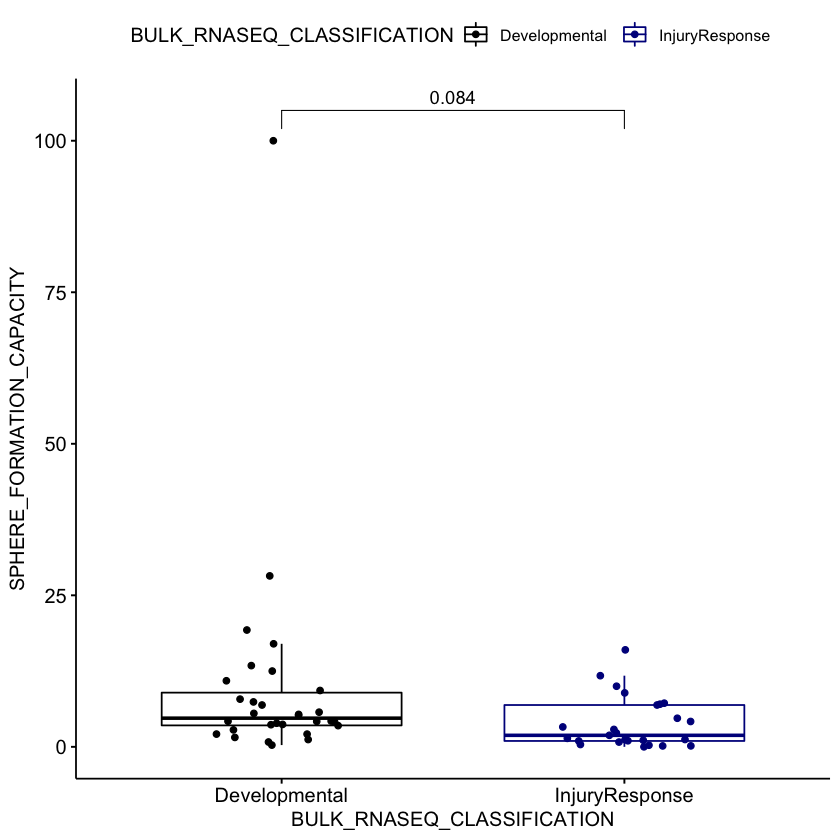

In [267]:
### boxplot of SFC

my_comparisons <- list( c("Developmental", "InjuryResponse")
                      )
p <- ggboxplot(sub, x = "BULK_RNASEQ_CLASSIFICATION", y = "SPHERE_FORMATION_CAPACITY",
          color = "BULK_RNASEQ_CLASSIFICATION", palette = c("black", "darkblue", "red"),
          add = "jitter") + stat_compare_means(comparisons = my_comparisons, method = "t.test") # Add pairwise comparisons p-value
p

[1] 54 16

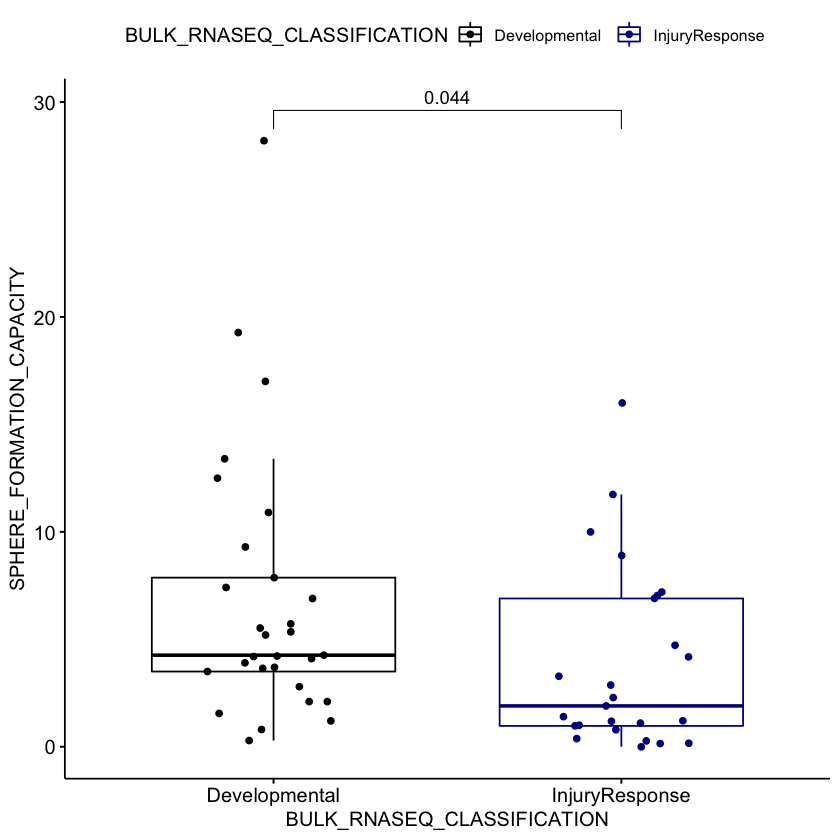

In [282]:
### remove outlier in Developmetnal group
sub2 <- sub[!sub$SPHERE_FORMATION_CAPACITY == 100, ]
dim(sub2)

my_comparisons <- list( c("Developmental", "InjuryResponse")
                      )
p <- ggboxplot(sub2, x = "BULK_RNASEQ_CLASSIFICATION", y = "SPHERE_FORMATION_CAPACITY",
          color = "BULK_RNASEQ_CLASSIFICATION", palette = c("black", "darkblue", "red"),
          add = "jitter") + stat_compare_means(comparisons = my_comparisons, method = "t.test") # Add pairwise comparisons p-value
p

----
### 3.4b Compare SFC between Dev and IR bulk RNA classifications - Dirks
---

In [302]:
remove <- c("N.A.", "N.D.", "NoTumours", "Underway")
sub <- dat[!dat$SPHERE_FORMATION_CAPACITY %in% remove, ]
sub$SPHERE_FORMATION_CAPACITY <- as.numeric(as.character(sub$SPHERE_FORMATION_CAPACITY))
sub <- sub[!is.na(sub$BULK_RNASEQ_CLASSIFICATION), ]
sub <- sub[sub$LAB == "Dirks", ]
table(sub$BULK_RNASEQ_CLASSIFICATION)



 Developmental InjuryResponse 
            12             24 

[1] 35 16

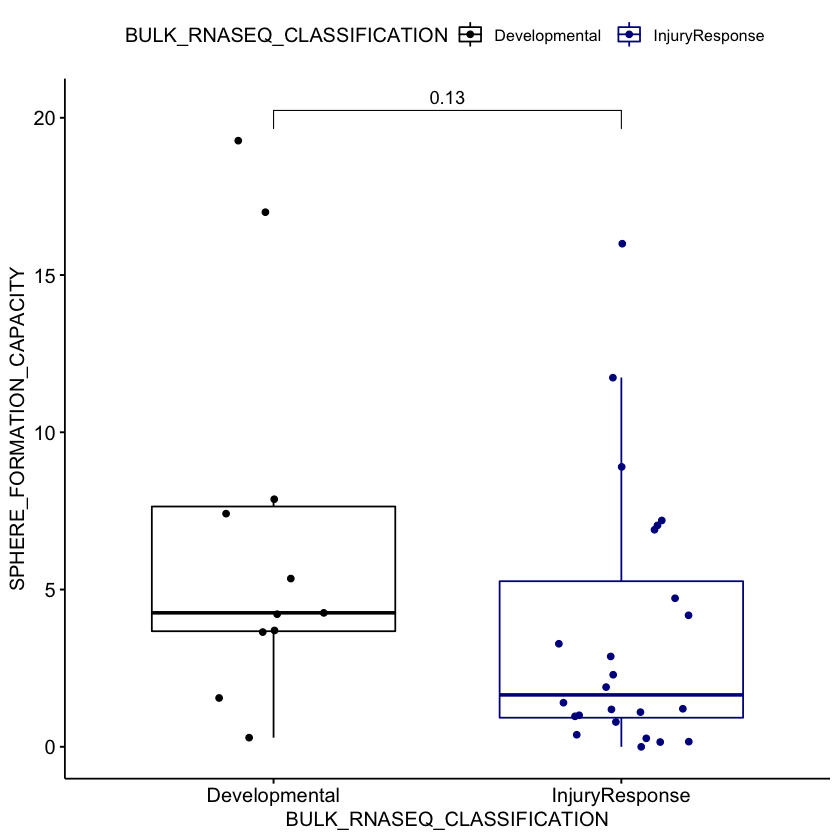

In [303]:
### remove outlier in Developmetnal group
sub2 <- sub[!sub$SPHERE_FORMATION_CAPACITY == 100, ]
dim(sub2)

my_comparisons <- list( c("Developmental", "InjuryResponse")
                      )
p <- ggboxplot(sub2, x = "BULK_RNASEQ_CLASSIFICATION", y = "SPHERE_FORMATION_CAPACITY",
          color = "BULK_RNASEQ_CLASSIFICATION", palette = c("black", "darkblue", "red"),
          add = "jitter") + stat_compare_means(comparisons = my_comparisons, method = "t.test") # Add pairwise comparisons p-value
p

In [306]:
remove <- c("N.A.", "N.D.", "NoTumours", "Underway")
sub <- dat[!dat$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS %in% remove, ]
sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS <- as.numeric(as.character(sub$MEDIAN_ORTHOTOPIC_XENOGRAFT_SURVIVAL_DAYS))
sub <- sub[!is.na(sub$BULK_RNASEQ_CLASSIFICATION), ]
dim(sub)

[1] 37 16

In [307]:
table(sub$BULK_RNASEQ_CLASSIFICATION)


 Developmental InjuryResponse 
            23             14 

In [312]:
fisher.test(matrix(c(23,0,11,3), nrow = 2, ncol = 2))


	Fisher's Exact Test for Count Data

data:  matrix(c(23, 0, 11, 3), nrow = 2, ncol = 2)
p-value = 0.04685
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.7268299       Inf
sample estimates:
odds ratio 
       Inf 
